In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling

In [2]:
%config Completer.use_jedi=False

In [3]:
plt.rcParams['figure.figsize']  = 12,8

In [4]:
data = pd.read_excel(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\1\Data Set.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [5]:
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [6]:
data.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

In [7]:
data.ndim

2

output = pandas_profiling.ProfileReport(data)
output.to_file(outputfile = "PandasProfiling2.html")

### Insighst from Pandas Profiling Report

addresscat is highly correlated with address (ρ = 0.92352)

agecat is highly correlated with age (ρ = 0.96988)

card2tenure is highly correlated with cardtenure (ρ = 0.96298)

card2tenurecat is highly correlated with card2tenure (ρ = 0.92439)

commutecat is highly correlated with commute (ρ = 0.98117)

edcat is highly correlated with ed (ρ = 0.9639)

equipmon is highly correlated with equip (ρ = 0.94051)

inccat is highly correlated with lninc (ρ = 0.94879)

lncardmon is highly correlated with cardmon (ρ = 0.91687)

lnequipmon is highly correlated with equipmon (ρ = 0.97931) Rejected

lnequipten is highly correlated with lntollten (ρ = 0.96611) Rejected

lnlongten is highly correlated with lnlongmon (ρ = 0.92171) Rejected

lntollmon is highly correlated with tollmon (ρ = 0.93783) Rejected

lntollten is highly correlated with lnlongten (ρ = 0.93139) Rejected

lnwiremon is highly correlated with wiremon (ρ = 0.95389) Rejected

lnwireten is highly correlated with lnequipten (ρ = 0.98318) Rejected

longten is highly correlated with longmon (ρ = 0.9857)

spoused is highly correlated with marital (ρ = 0.95577) Rejected

spousedcat is highly correlated with spoused (ρ = 0.98403) Rejected

tenure is highly correlated with card2tenure (ρ = 0.92824)

lncardten has 1422 / 28.4% missing values

--------------------------------------------------------------------------------------------------------------------------------
addresscat , agecat , card2tenure ,card2tenurecat, commutecat , edcat , equipmon , inccat , lncardmon , lnequipmon , lnequipten ,
lnlongten , lntollmon , lntollten , lnwiremon , lnwireten , longten , spoused , spousedcat 

**The above variables need to be dropped because of their higher Correlation with other variables. (Count = 19 )

-----------------------------------------------------------------------------------------------------------------------------
lncardten has missings greater than 25% , so we will directly drop this variable.

**The above variable needs to be dropped due to high % of Missings values. (Count = 1)

-----------------------------------------------------------------------------------------------------------------------------
***The CV (co-efficient of variation) values are quite good for the Continuous variables in the data (> 0.1)

In [8]:
data["totalspent"] = data["cardspent"] + data["card2spent"]  # Summing up the values into a single variable

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 131 entries, custid to totalspent
dtypes: float64(32), int64(97), object(2)
memory usage: 5.0+ MB


**A )The data naming convention is a good one. We are dropping 19 varibales due to high correlation with other variables. We are dropping 1 varibale due to high no.of missing values in the data .**

**B )Now, various log version of the same variables & Categorical version of the same variables are present in the data set. So , we need to remove it as keeping both of them does not makes any sense. With this context , we are removing 6 more variables .**

**C )For this business problem , we will be converting "cardspent" and "card2spent" into a new single variable "totalspent" which will have the combined value of these 2 variables. So, we are adding 1 new variable & We are dropping variables related to card1 and card2 .Therefore , we are removing 11 variables.**

**D )We will also drop the "custid" variable since its totally unique.**

**Total variables removed = 20 (A) + 6 (B) + 11 (C) + 1 (D) = 38 variables (131-38 = 93) Variables added = 1 (C)**

In [10]:
data.drop(columns=['addresscat','agecat','card2tenure','commutecat','edcat','equipmon','inccat','lncardmon','lnequipmon',
'lnlongten','lntollmon','lntollten','longten','lnwireten','spoused','spousedcat',
'card2tenurecat','lncardten','lnequipten','lnwiremon',
'lninc',
'lnothdebt',
'lncreddebt',
'empcat',
'carcatvalue',
'lnlongmon',
'cardspent',
'cardtenurecat',
'cardtenure',
'card2spent','custid'],axis = 1,inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 100 columns):
region               5000 non-null int64
townsize             4998 non-null float64
gender               5000 non-null int64
age                  5000 non-null int64
birthmonth           5000 non-null object
ed                   5000 non-null int64
jobcat               5000 non-null int64
union                5000 non-null int64
employ               5000 non-null int64
retire               5000 non-null int64
income               5000 non-null int64
debtinc              5000 non-null float64
creddebt             5000 non-null float64
othdebt              5000 non-null float64
default              5000 non-null int64
jobsat               5000 non-null int64
marital              5000 non-null int64
reside               5000 non-null int64
pets                 5000 non-null int64
pets_cats            5000 non-null int64
pets_dogs            5000 non-null int64
pets_birds           5

C:\Users\Akhtar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


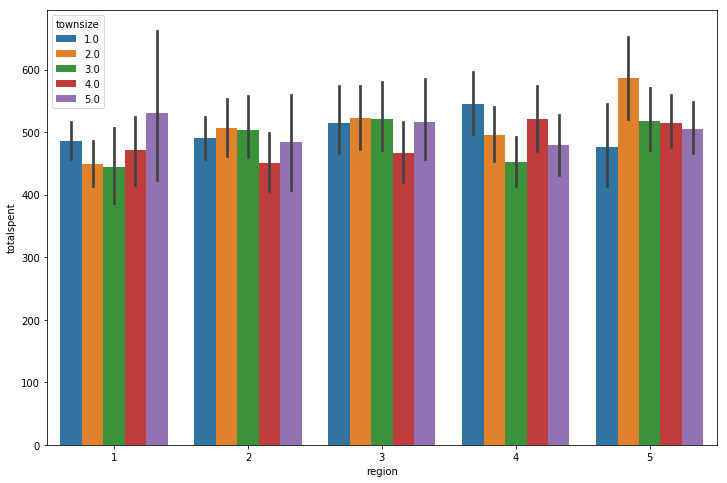

In [12]:
sns.barplot(x = "region",y= "totalspent",data = data,hue = "townsize")
plt.show()

In [13]:
# Categorical variables = 66
cat_var_names = ['gender','birthmonth',
'union',
'retire',
'default',
'carown',
'marital',
'homeown',
'cartype',
'carbought',
'carbuy',
'commutecar',
'commutemotorcycle',
'commutecarpool',
'commutebus',
'commuterail',
'commutepublic',
'commutebike',
'commutewalk',
'commutenonmotor',
'telecommute',
'polview',
'vote',
'active',
'churn',
'tollfree',
'callcard',
'wireless',
'multline',
'voice',
'callid',
'callwait',
'forward',
'ownvcr',
'response_03',
'confer',
'ebill',
'owntv',
'ownfax',
'owndvd',
'owncd',
'ownpda',
'ownipod',
'response_02',
'response_01',
'ownpc',
'owngame',
'news','region','townsize','jobcat','jobsat','employ','address','hometype','cars','reason','polparty','polcontrib',
'bfast','pager','internet','commute','tenure','equip','card2benefit','card2',
'card',
'cardbenefit',
'cardtype',
'card2type','cardfee',
'card2fee']

In [14]:
# Continuous variable = 27
num_var_names = ['age',
'ed',                  
'income',               
'debtinc',             
'creddebt',             
'othdebt',             
'reside',             
'pets',                
'pets_cats',           
'pets_dogs',            
'pets_birds',           
'pets_reptiles',       
'pets_small',         
'pets_saltfish',       
'pets_freshfish',      
'carvalue',           
'commutetime',        
'longmon',            
'tollmon',            
'tollten',
'equipten',         
'cardmon',              
'cardten',           
'wiremon',            
'wireten',              
'hourstv',        
'totalspent']

In [15]:
data_cat = data[cat_var_names]

In [16]:
data_num = data[num_var_names]

In [17]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 73 columns):
gender               5000 non-null int64
birthmonth           5000 non-null object
union                5000 non-null int64
retire               5000 non-null int64
default              5000 non-null int64
carown               5000 non-null int64
marital              5000 non-null int64
homeown              5000 non-null int64
cartype              5000 non-null int64
carbought            5000 non-null int64
carbuy               5000 non-null int64
commutecar           5000 non-null int64
commutemotorcycle    5000 non-null int64
commutecarpool       5000 non-null int64
commutebus           5000 non-null int64
commuterail          5000 non-null int64
commutepublic        5000 non-null int64
commutebike          5000 non-null int64
commutewalk          5000 non-null int64
commutenonmotor      5000 non-null int64
telecommute          5000 non-null int64
polview              5000 non-n

In [18]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
age               5000 non-null int64
ed                5000 non-null int64
income            5000 non-null int64
debtinc           5000 non-null float64
creddebt          5000 non-null float64
othdebt           5000 non-null float64
reside            5000 non-null int64
pets              5000 non-null int64
pets_cats         5000 non-null int64
pets_dogs         5000 non-null int64
pets_birds        5000 non-null int64
pets_reptiles     5000 non-null int64
pets_small        5000 non-null int64
pets_saltfish     5000 non-null int64
pets_freshfish    5000 non-null int64
carvalue          5000 non-null float64
commutetime       4998 non-null float64
longmon           5000 non-null float64
tollmon           5000 non-null float64
tollten           5000 non-null float64
equipten          5000 non-null float64
cardmon           5000 non-null float64
cardten           4998 non-null float

ed  income debtinc creddebt othdebt carvalue  commutetime longmon tollmon tollten equipten cardmon cardten wiremon wireten 

In [19]:
#Handling Outliers for Continuous Data

def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))

In [20]:
# Missing Value treatment for Continuous Data 

def Missing_imputation(x):
    x = x.fillna(x.median())
    return x


data_num=data_num.apply(lambda x: Missing_imputation(x))

In [21]:
data_num.isnull().sum()

age               0
ed                0
income            0
debtinc           0
creddebt          0
othdebt           0
reside            0
pets              0
pets_cats         0
pets_dogs         0
pets_birds        0
pets_reptiles     0
pets_small        0
pets_saltfish     0
pets_freshfish    0
carvalue          0
commutetime       0
longmon           0
tollmon           0
tollten           0
equipten          0
cardmon           0
cardten           0
wiremon           0
wireten           0
hourstv           0
totalspent        0
dtype: int64

In [22]:
data_num.head()

,age,ed,income,debtinc,creddebt,othdebt,reside,pets,pets_cats,pets_dogs,...,longmon,tollmon,tollten,equipten,cardmon,cardten,wiremon,wireten,hourstv,totalspent
0,20.0,15.0,31.0,11.1,1.200909,2.240091,3.0,0.0,0.0,0.0,...,6.50,29.0,161.05,126.1,14.25,60.0,0.00,0.00,13.0,149.46
1,22.0,17.0,15.0,18.6,1.222020,1.567980,2.0,6.0,0.0,0.0,...,8.90,0.0,0.00,1975.0,16.00,610.0,45.65,1683.55,18.0,77.54
2,67.0,14.0,35.0,9.9,0.928620,2.536380,3.0,3.0,2.0,1.0,...,28.40,0.0,0.00,0.0,23.00,1410.0,0.00,0.00,21.0,359.97
3,23.0,16.0,20.0,5.7,0.033160,1.117200,5.0,0.0,0.0,0.0,...,6.00,0.0,0.00,0.0,21.00,685.0,0.00,0.00,26.0,359.41
4,26.0,16.0,23.0,1.7,0.214659,0.176341,4.0,0.0,0.0,0.0,...,3.05,16.5,387.70,0.0,17.25,360.0,19.05,410.80,27.0,507.83


In [23]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [24]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,315.784902,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.00000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.272100e+04,14.544200,14.000000,3.242553,10.514149,8.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.00000,19.000000,20.000000,21.000000,21.000000
income,5000.0,0.0,2.681495e+05,53.629900,38.000000,46.567698,2168.550537,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.00000,109.100000,147.000000,272.000100,272.010000
debtinc,5000.0,0.0,4.957060e+04,9.914120,8.800000,6.241691,38.958700,0.700000,0.700000,1.900000,2.800000,5.100000,8.800000,13.60000,18.600000,22.200000,29.200000,29.200000
creddebt,5000.0,0.0,8.791845e+03,1.758369,0.926437,2.380681,5.667644,0.033160,0.033166,0.101088,0.175682,0.385520,0.926437,2.06382,4.299470,6.373010,14.280004,14.280358
othdebt,5000.0,0.0,1.761253e+04,3.522506,2.098540,4.221760,17.823256,0.114299,0.114312,0.287692,0.457997,0.980301,2.098540,4.31478,8.062046,11.815981,24.062466,24.064260
reside,5000.0,0.0,1.097100e+04,2.194200,2.000000,1.361491,1.853657,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.00000,4.000000,5.000000,6.000000,6.000000
pets,5000.0,0.0,1.524600e+04,3.049200,2.000000,3.351213,11.230625,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.00000,8.000000,10.000000,13.000000,13.000000
pets_cats,5000.0,0.0,2.452000e+03,0.490400,0.000000,0.822462,0.676443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,2.000000,2.000000,3.000000,3.000000
pets_dogs,5000.0,0.0,1.914000e+03,0.382800,0.000000,0.754969,0.569978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,2.000000,3.000000,3.000000


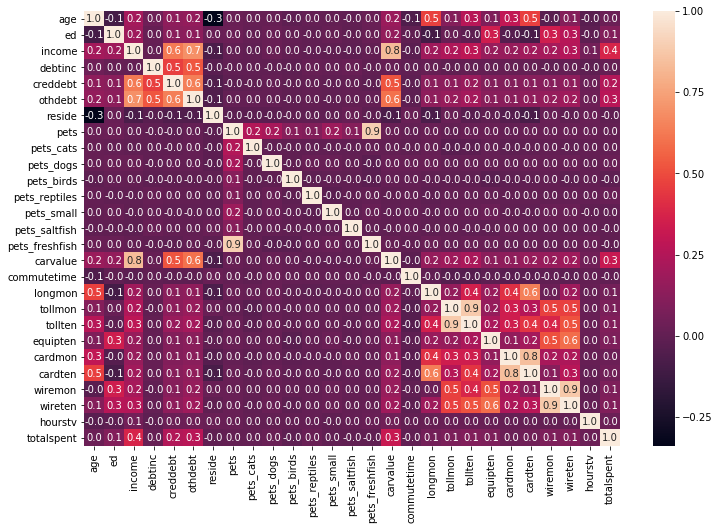

In [25]:
plt.subplots(figsize = (12,8))
sns.heatmap(data_num.corr(),fmt="1.1f",annot=True)

### Transformations to check the best correlation form of the variable with the dependent variable

In [26]:
trans_income = pd.DataFrame({"log_val":np.log(data_num.income+1),"exp_val":np.exp(data_num.income),
              "sqrt_val":np.sqrt(data_num.income),"sqr_val":np.square(data_num.income),"Dependent_val":data_num.totalspent})
trans_income

,log_val,exp_val,sqrt_val,sqr_val,Dependent_val
0,3.465736,2.904885e+13,5.567764,961.0000,149.4600
1,2.772589,3.269017e+06,3.872983,225.0000,77.5400
2,3.583519,1.586013e+15,5.916080,1225.0000,359.9700
3,3.044522,4.851652e+08,4.472136,400.0000,359.4100
4,3.178054,9.744803e+09,4.795832,529.0000,507.8300
5,4.682131,2.947878e+46,10.344080,11449.0000,228.2700
6,4.356709,2.758513e+33,8.774964,5929.0000,952.4600
7,4.584967,1.338335e+42,9.848858,9409.0000,1304.8000
8,2.833213,8.886111e+06,4.000000,256.0000,467.8300
9,4.442651,3.025077e+36,9.165151,7056.0000,310.8100


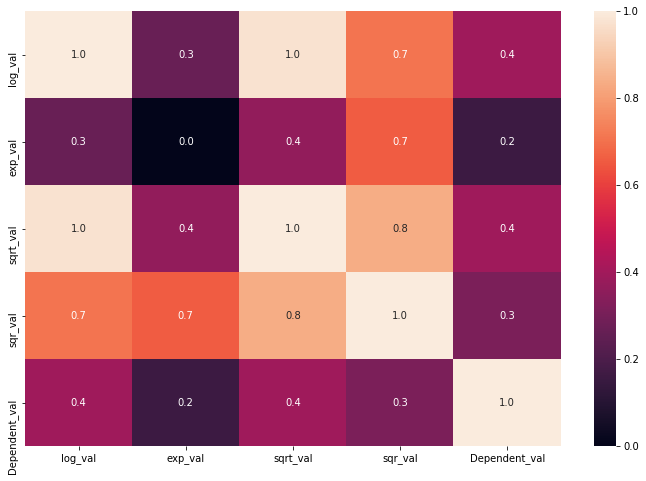

In [27]:
sns.heatmap(trans_income.corr(),fmt="1.1f",annot=True)

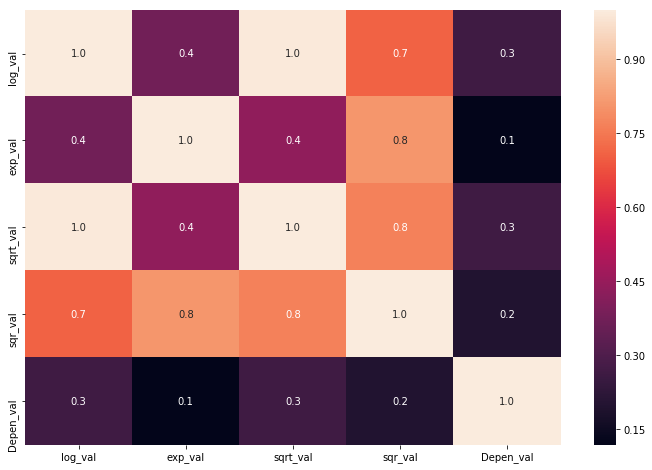

In [28]:
trans_creddebt = pd.DataFrame({"log_val":np.log(data_num.creddebt+1),"exp_val":np.exp(data_num.creddebt),
              "sqrt_val":np.sqrt(data_num.creddebt),"sqr_val":np.square(data_num.creddebt),"Depen_val":data_num.totalspent})
sns.heatmap(trans_creddebt.corr(),fmt="1.1f",annot=True)

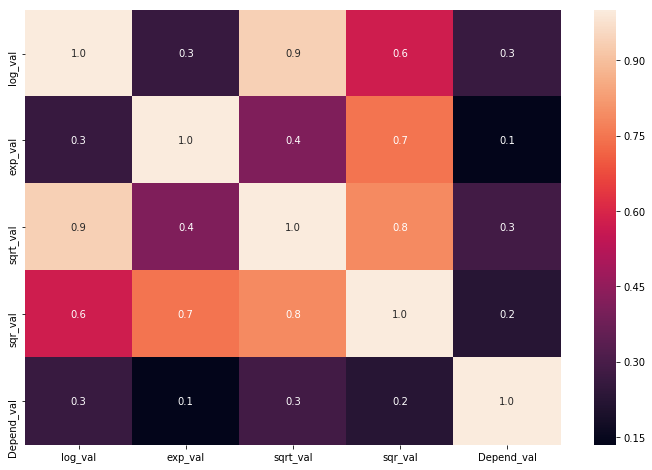

In [29]:
trans_othdebt = pd.DataFrame({"log_val":np.log(data_num.othdebt),"exp_val":np.exp(data_num.othdebt),
              "sqrt_val":np.sqrt(data_num.othdebt),"sqr_val":np.square(data_num.othdebt),"Depend_val":data_num.totalspent})
sns.heatmap(trans_othdebt.corr(),fmt="1.1f",annot=True)

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


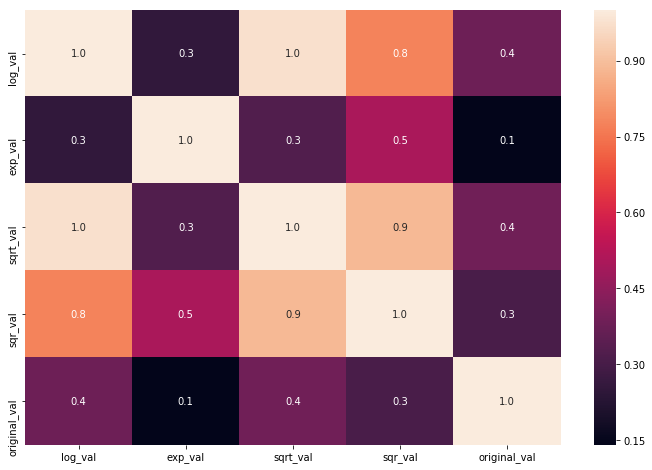

In [30]:
trans_carvalue = pd.DataFrame({"log_val":np.log(data_num.carvalue),"exp_val":np.exp(data_num.carvalue),
              "sqrt_val":np.sqrt(data_num.carvalue),"sqr_val":np.square(data_num.carvalue),"original_val":data_num.totalspent})
sns.heatmap(trans_carvalue.corr(),fmt="1.1f",annot=True)

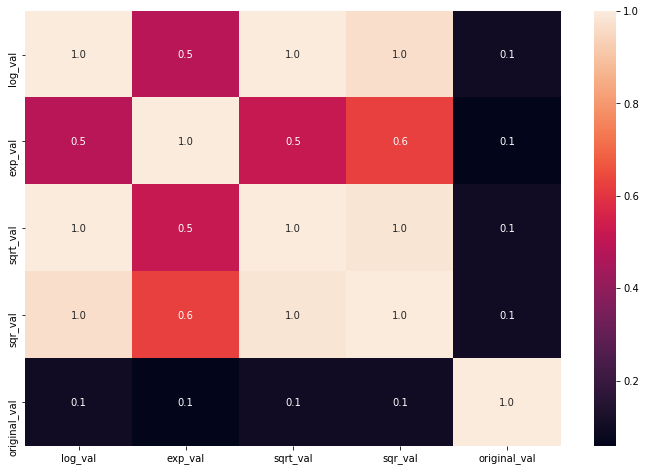

In [31]:
trans_ed = pd.DataFrame({"log_val":np.log(data_num.ed+1),"exp_val":np.exp(data_num.ed),
              "sqrt_val":np.sqrt(data_num.ed),"sqr_val":np.square(data_num.ed),"original_val":data_num.totalspent})
sns.heatmap(trans_ed.corr(),fmt="1.1f",annot=True)

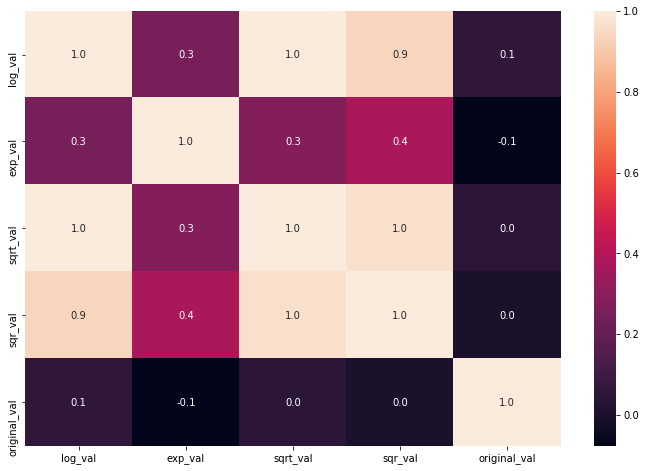

In [32]:
trans_age = pd.DataFrame({"log_val":np.log(data_num.age+1),"exp_val":np.exp(data_num.age),
              "sqrt_val":np.sqrt(data_num.age),"sqr_val":np.square(data_num.age),"original_val":data_num.totalspent})
sns.heatmap(trans_age.corr(),fmt="1.1f",annot=True)

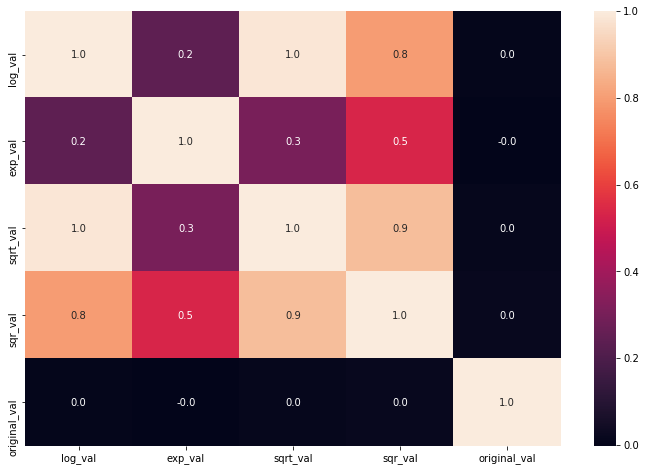

In [33]:
trans_debtinc = pd.DataFrame({"log_val":np.log(data_num.debtinc+1),"exp_val":np.exp(data_num.debtinc),
              "sqrt_val":np.sqrt(data_num.debtinc),"sqr_val":np.square(data_num.debtinc),"original_val":data_num.totalspent})
sns.heatmap(trans_debtinc.corr(),fmt="1.1f",annot=True)

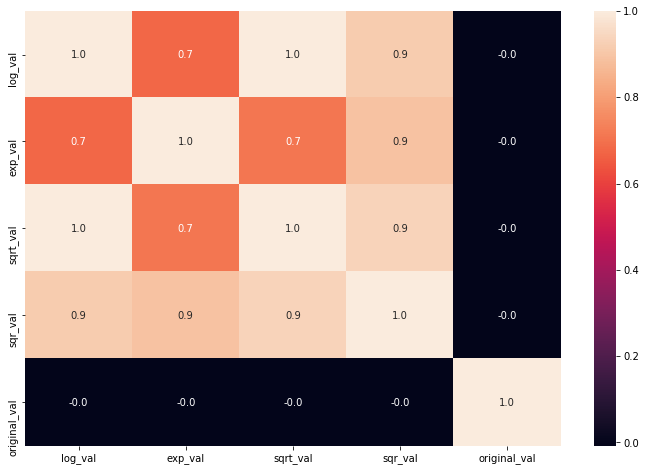

In [34]:
trans_reside = pd.DataFrame({"log_val":np.log(data_num.reside+1),"exp_val":np.exp(data_num.reside),
              "sqrt_val":np.sqrt(data_num.reside),"sqr_val":np.square(data_num.reside),"original_val":data_num.totalspent})
sns.heatmap(trans_reside.corr(),fmt="1.1f",annot=True)

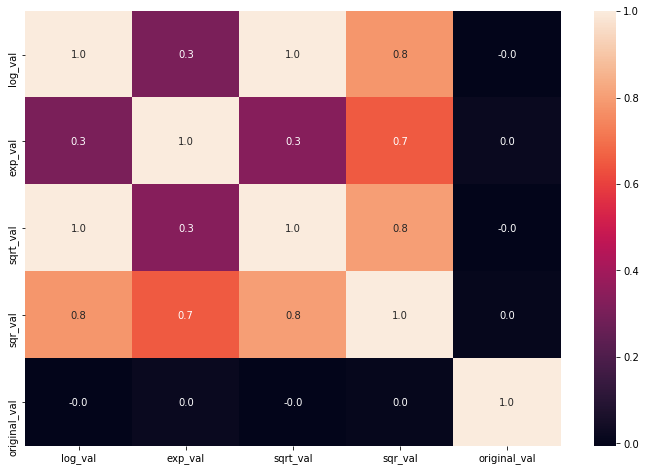

In [35]:
trans_pets = pd.DataFrame({"log_val":np.log(data_num.pets+1),"exp_val":np.exp(data_num.pets),
              "sqrt_val":np.sqrt(data_num.pets),"sqr_val":np.square(data_num.pets),"original_val":data_num.totalspent})
sns.heatmap(trans_pets.corr(),fmt="1.1f",annot=True)

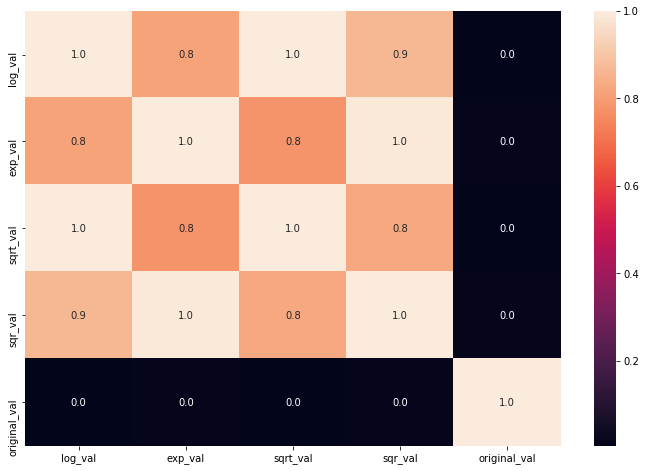

In [36]:
trans_pets_cats = pd.DataFrame({"log_val":np.log(data_num.pets_cats+1),"exp_val":np.exp(data_num.pets_cats),
              "sqrt_val":np.sqrt(data_num.pets_cats),"sqr_val":np.square(data_num.pets_cats),"original_val":data_num.totalspent})
sns.heatmap(trans_pets_cats.corr(),fmt="1.1f",annot=True)

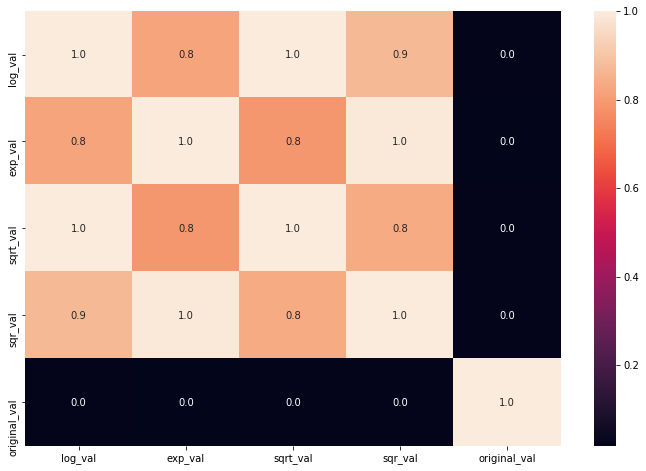

In [37]:
trans_pets_dogs = pd.DataFrame({"log_val":np.log(data_num.pets_dogs+1),"exp_val":np.exp(data_num.pets_dogs),
              "sqrt_val":np.sqrt(data_num.pets_dogs),"sqr_val":np.square(data_num.pets_dogs),"original_val":data_num.totalspent})
sns.heatmap(trans_pets_dogs.corr(),fmt="1.1f",annot=True)

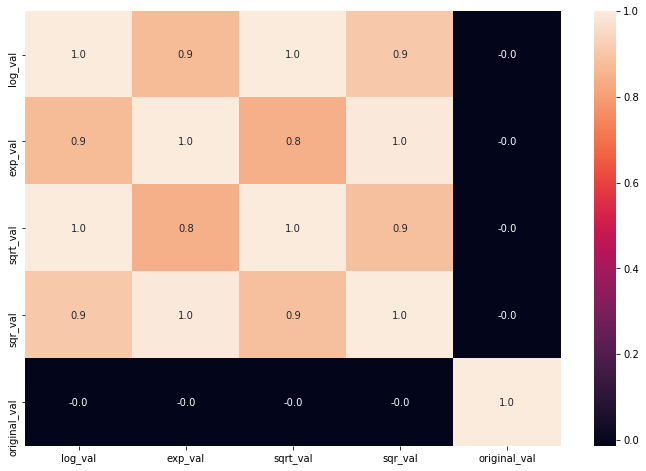

In [38]:
trans_pets_birds = pd.DataFrame({"log_val":np.log(data_num.pets_birds+1),"exp_val":np.exp(data_num.pets_birds),
              "sqrt_val":np.sqrt(data_num.pets_birds),"sqr_val":np.square(data_num.pets_birds),"original_val":data_num.totalspent})
sns.heatmap(trans_pets_birds.corr(),fmt="1.1f",annot=True)

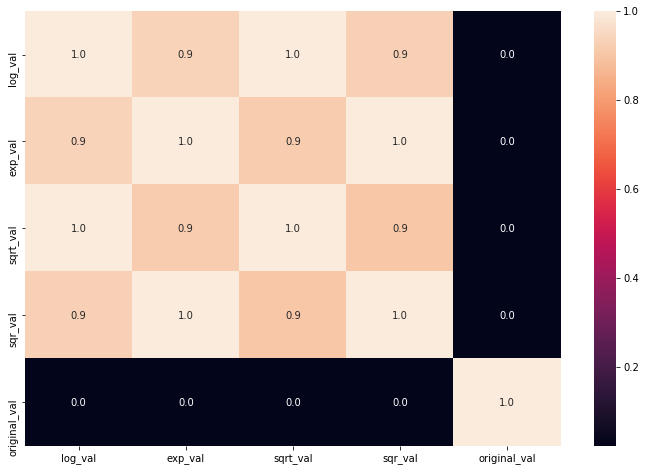

In [39]:
trans_pets_reptiles = pd.DataFrame({"log_val":np.log(data_num.pets_reptiles+1),"exp_val":np.exp(data_num.pets_reptiles),
              "sqrt_val":np.sqrt(data_num.pets_reptiles),"sqr_val":np.square(data_num.pets_reptiles),"original_val":data_num.totalspent})
sns.heatmap(trans_pets_reptiles.corr(),fmt="1.1f",annot=True)

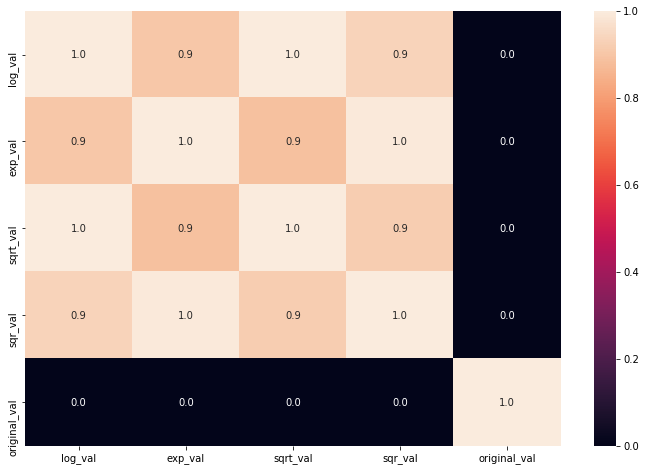

In [40]:
trans_pets_small = pd.DataFrame({"log_val":np.log(data_num.pets_small+1),"exp_val":np.exp(data_num.pets_small),
              "sqrt_val":np.sqrt(data_num.pets_small),"sqr_val":np.square(data_num.pets_small),"original_val":data_num.totalspent})
sns.heatmap(trans_pets_small.corr(),fmt="1.1f",annot=True)

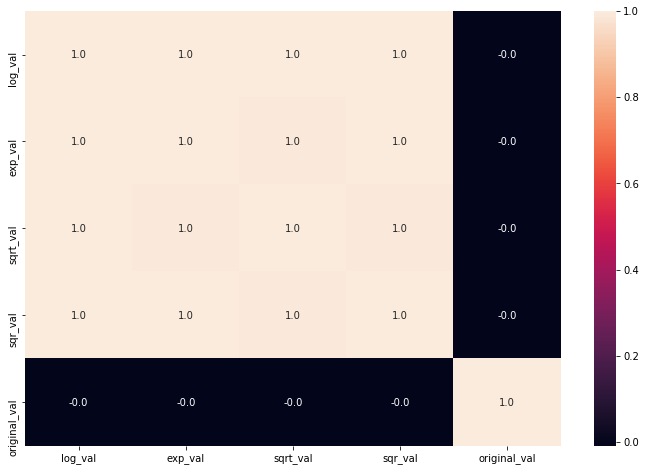

In [41]:
trans_pets_saltfish = pd.DataFrame({"log_val":np.log(data_num.pets_saltfish+1),"exp_val":np.exp(data_num.pets_saltfish),
              "sqrt_val":np.sqrt(data_num.pets_saltfish),"sqr_val":np.square(data_num.pets_saltfish),"original_val":data_num.totalspent})
sns.heatmap(trans_pets_saltfish.corr(),fmt="1.1f",annot=True)

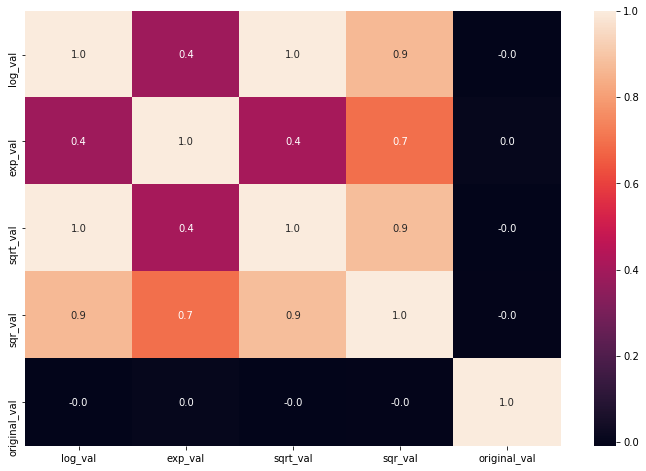

In [42]:
trans_pets_freshfish = pd.DataFrame({"log_val":np.log(data_num.pets_freshfish+1),"exp_val":np.exp(data_num.pets_freshfish),
              "sqrt_val":np.sqrt(data_num.pets_freshfish),"sqr_val":np.square(data_num.pets_freshfish),"original_val":data_num.totalspent})
sns.heatmap(trans_pets_freshfish.corr(),fmt="1.1f",annot=True)

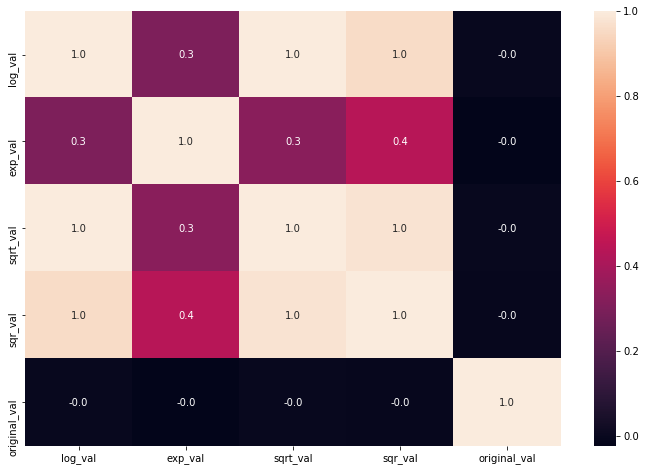

In [43]:
trans_commutetime = pd.DataFrame({"log_val":np.log(data_num.commutetime+1),"exp_val":np.exp(data_num.commutetime),
              "sqrt_val":np.sqrt(data_num.commutetime),"sqr_val":np.square(data_num.commutetime),"original_val":data_num.totalspent})
sns.heatmap(trans_commutetime.corr(),fmt="1.1f",annot=True)

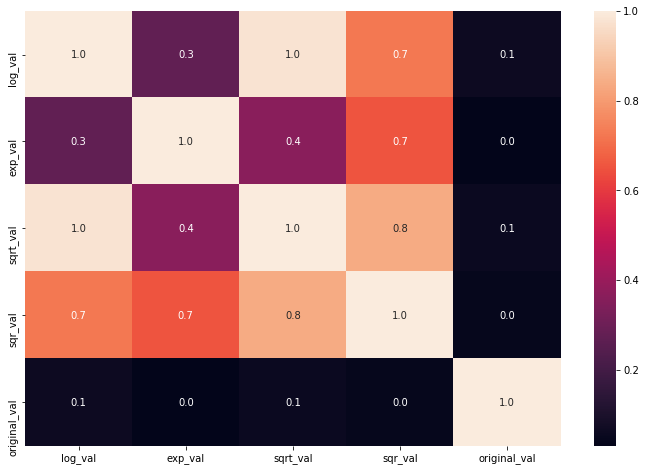

In [44]:
trans_longmon = pd.DataFrame({"log_val":np.log(data_num.longmon+1),"exp_val":np.exp(data_num.longmon),
              "sqrt_val":np.sqrt(data_num.longmon),"sqr_val":np.square(data_num.longmon),"original_val":data_num.totalspent})
sns.heatmap(trans_longmon.corr(),fmt="1.1f",annot=True)

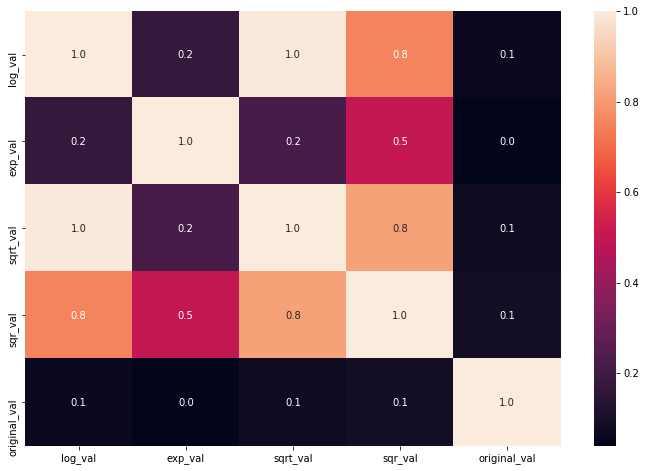

In [45]:
trans_tollmon = pd.DataFrame({"log_val":np.log(data_num.tollmon+1),"exp_val":np.exp(data_num.tollmon),
              "sqrt_val":np.sqrt(data_num.tollmon),"sqr_val":np.square(data_num.tollmon),"original_val":data_num.totalspent})
sns.heatmap(trans_tollmon.corr(),fmt="1.1f",annot=True)

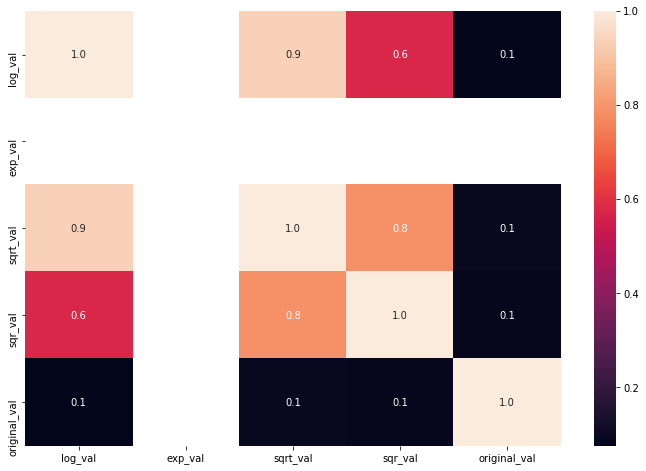

In [46]:
trans_tollten = pd.DataFrame({"log_val":np.log(data_num.tollten+1),"exp_val":np.exp(data_num.tollten),
              "sqrt_val":np.sqrt(data_num.tollten),"sqr_val":np.square(data_num.tollten),"original_val":data_num.totalspent})
sns.heatmap(trans_tollten.corr(),fmt="1.1f",annot=True)

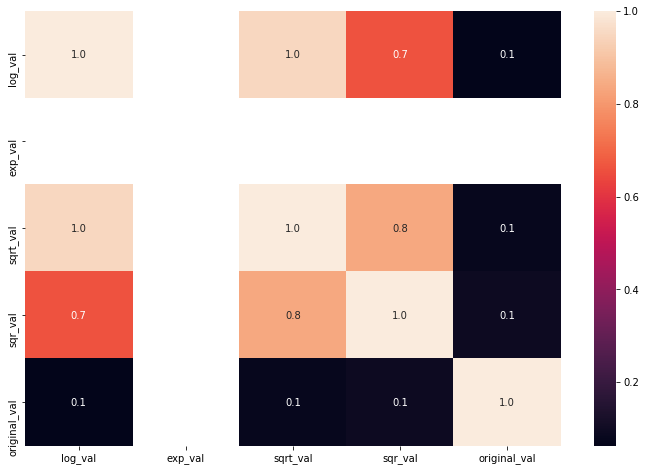

In [47]:
trans_equipten = pd.DataFrame({"log_val":np.log(data_num.equipten+1),"exp_val":np.exp(data_num.equipten),
              "sqrt_val":np.sqrt(data_num.equipten),"sqr_val":np.square(data_num.equipten),"original_val":data_num.totalspent})
sns.heatmap(trans_equipten.corr(),fmt="1.1f",annot=True)

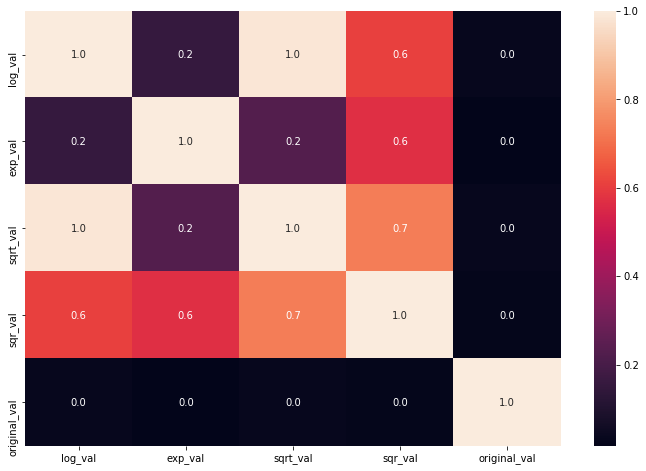

In [48]:
trans_cardmon = pd.DataFrame({"log_val":np.log(data_num.cardmon+1),"exp_val":np.exp(data_num.cardmon),
              "sqrt_val":np.sqrt(data_num.cardmon),"sqr_val":np.square(data_num.cardmon),"original_val":data_num.totalspent})
sns.heatmap(trans_cardmon.corr(),fmt="1.1f",annot=True)

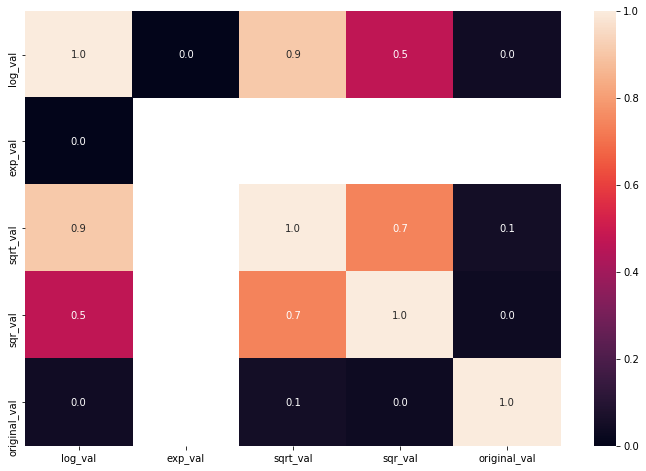

In [49]:
trans_cardten = pd.DataFrame({"log_val":np.log(data_num.cardten+1),"exp_val":np.exp(data_num.cardten),
              "sqrt_val":np.sqrt(data_num.cardten),"sqr_val":np.square(data_num.cardten),"original_val":data_num.totalspent})
sns.heatmap(trans_cardten.corr(),fmt="1.1f",annot=True)

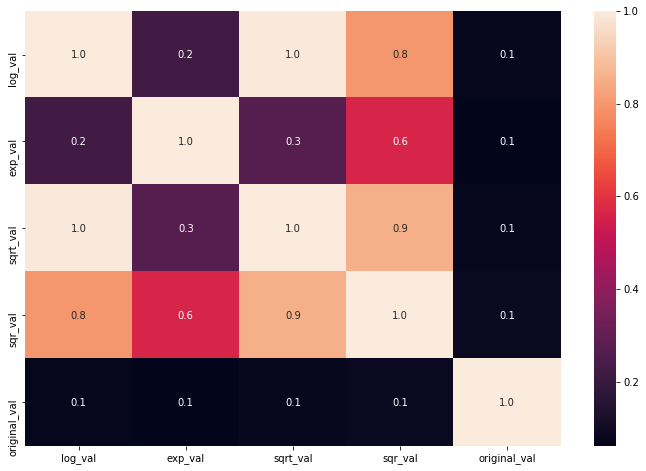

In [50]:
trans_wiremon = pd.DataFrame({"log_val":np.log(data_num.wiremon+1),"exp_val":np.exp(data_num.wiremon),
              "sqrt_val":np.sqrt(data_num.wiremon),"sqr_val":np.square(data_num.wiremon),"original_val":data_num.totalspent})
sns.heatmap(trans_wiremon.corr(),fmt="1.1f",annot=True)

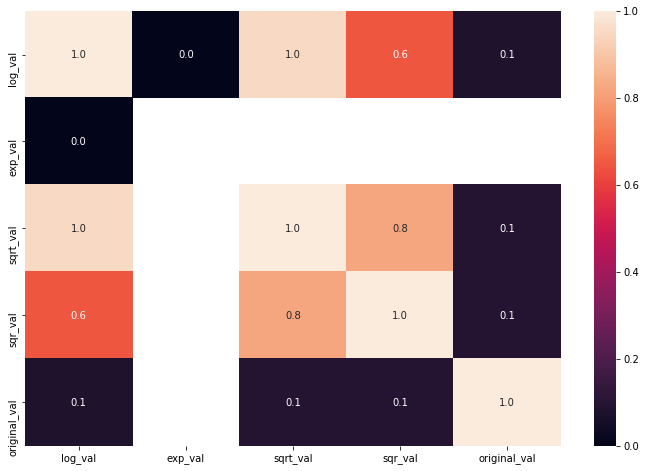

In [51]:
trans_wireten = pd.DataFrame({"log_val":np.log(data_num.wireten+1),"exp_val":np.exp(data_num.wireten),
              "sqrt_val":np.sqrt(data_num.wireten),"sqr_val":np.square(data_num.wireten),"original_val":data_num.totalspent})
sns.heatmap(trans_wireten.corr(),fmt="1.1f",annot=True)

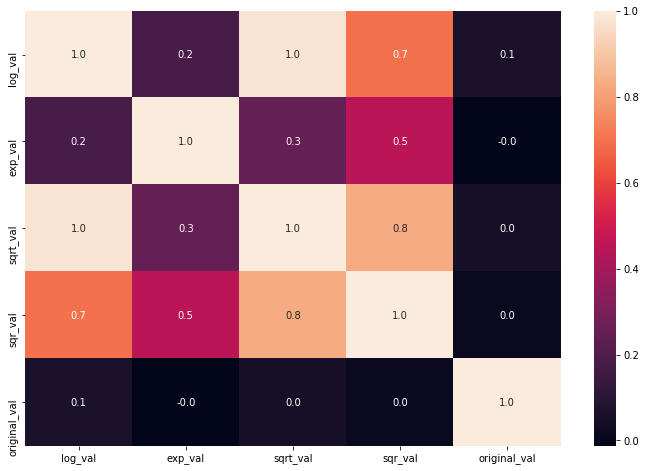

In [52]:
trans_hourstv = pd.DataFrame({"log_val":np.log(data_num.hourstv+1),"exp_val":np.exp(data_num.hourstv),
              "sqrt_val":np.sqrt(data_num.hourstv),"sqr_val":np.square(data_num.hourstv),"original_val":data_num.totalspent})
sns.heatmap(trans_hourstv.corr(),fmt="1.1f",annot=True)

In [53]:
### After having Transformation , the correlation values between the independent variables and dependent variable 
### are same as before Transformation. Therefore, not applying Transformations to the Final Variable set.

In [54]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
age               5000 non-null float64
ed                5000 non-null float64
income            5000 non-null float64
debtinc           5000 non-null float64
creddebt          5000 non-null float64
othdebt           5000 non-null float64
reside            5000 non-null float64
pets              5000 non-null float64
pets_cats         5000 non-null float64
pets_dogs         5000 non-null float64
pets_birds        5000 non-null float64
pets_reptiles     5000 non-null float64
pets_small        5000 non-null float64
pets_saltfish     5000 non-null float64
pets_freshfish    5000 non-null float64
carvalue          5000 non-null float64
commutetime       5000 non-null float64
longmon           5000 non-null float64
tollmon           5000 non-null float64
tollten           5000 non-null float64
equipten          5000 non-null float64
cardmon           5000 non-null float64
cardten      

In [55]:
data_num.head()

,age,ed,income,debtinc,creddebt,othdebt,reside,pets,pets_cats,pets_dogs,...,longmon,tollmon,tollten,equipten,cardmon,cardten,wiremon,wireten,hourstv,totalspent
0,20.0,15.0,31.0,11.1,1.200909,2.240091,3.0,0.0,0.0,0.0,...,6.50,29.0,161.05,126.1,14.25,60.0,0.00,0.00,13.0,149.46
1,22.0,17.0,15.0,18.6,1.222020,1.567980,2.0,6.0,0.0,0.0,...,8.90,0.0,0.00,1975.0,16.00,610.0,45.65,1683.55,18.0,77.54
2,67.0,14.0,35.0,9.9,0.928620,2.536380,3.0,3.0,2.0,1.0,...,28.40,0.0,0.00,0.0,23.00,1410.0,0.00,0.00,21.0,359.97
3,23.0,16.0,20.0,5.7,0.033160,1.117200,5.0,0.0,0.0,0.0,...,6.00,0.0,0.00,0.0,21.00,685.0,0.00,0.00,26.0,359.41
4,26.0,16.0,23.0,1.7,0.214659,0.176341,4.0,0.0,0.0,0.0,...,3.05,16.5,387.70,0.0,17.25,360.0,19.05,410.80,27.0,507.83


In [56]:
data_num.isnull().sum()

age               0
ed                0
income            0
debtinc           0
creddebt          0
othdebt           0
reside            0
pets              0
pets_cats         0
pets_dogs         0
pets_birds        0
pets_reptiles     0
pets_small        0
pets_saltfish     0
pets_freshfish    0
carvalue          0
commutetime       0
longmon           0
tollmon           0
tollten           0
equipten          0
cardmon           0
cardten           0
wiremon           0
wireten           0
hourstv           0
totalspent        0
dtype: int64

In [57]:
data_cat.head()

,gender,birthmonth,union,retire,default,carown,marital,homeown,cartype,carbought,...,tenure,equip,card2benefit,card2,card,cardbenefit,cardtype,card2type,cardfee,card2fee
0,1,September,1,0,1,1,0,0,0,0,...,5,1,1,5,3,1,1,3,0,0
1,0,May,0,0,1,1,0,1,1,0,...,39,1,3,4,2,1,4,1,0,0
2,1,June,0,0,0,1,1,1,1,0,...,65,0,3,4,2,4,1,1,0,0
3,0,May,0,0,1,1,1,1,1,0,...,36,0,4,3,2,4,1,2,0,0
4,0,July,0,0,0,0,1,0,1,0,...,21,0,2,1,4,1,2,3,0,0


In [58]:
# By Manually Observing in the categorical data ,-1 is present in three columns
# Therefore , for those 3 columns , making changes and handling missings.

In [59]:
data_cat.carown = data_cat.carown.replace(-1,np.nan).fillna(data_cat.carown.mode()[0])

C:\Users\Akhtar\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [60]:
data_cat.carown.value_counts()

1.0    4201
0.0     799
Name: carown, dtype: int64

In [61]:
data_cat.carown = data_cat.carown.astype('int')

In [62]:
data_cat.cartype = data_cat.cartype.replace(-1,np.nan).fillna(data_cat.cartype.mode()[0]) 

In [63]:
data_cat.cartype.value_counts()

0.0    2784
1.0    2216
Name: cartype, dtype: int64

In [64]:
data_cat.cartype = data_cat.cartype.astype('int')

In [65]:
data_cat.carbought = data_cat.carbought.replace(-1,np.nan).fillna(data_cat.carbought.mode()[0])

In [66]:
data_cat.carbought.value_counts()

0.0    3398
1.0    1602
Name: carbought, dtype: int64

In [67]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 73 columns):
gender               5000 non-null int64
birthmonth           5000 non-null object
union                5000 non-null int64
retire               5000 non-null int64
default              5000 non-null int64
carown               5000 non-null int32
marital              5000 non-null int64
homeown              5000 non-null int64
cartype              5000 non-null int32
carbought            5000 non-null float64
carbuy               5000 non-null int64
commutecar           5000 non-null int64
commutemotorcycle    5000 non-null int64
commutecarpool       5000 non-null int64
commutebus           5000 non-null int64
commuterail          5000 non-null int64
commutepublic        5000 non-null int64
commutebike          5000 non-null int64
commutewalk          5000 non-null int64
commutenonmotor      5000 non-null int64
telecommute          5000 non-null int64
polview              5000 non

data_cat.carbought = data_cat.carbought.astype('int')

In [68]:
#Handling missings for Categorical Data

def Cat_Missing_imputation(x):
    x = x.fillna(x.mode())
    return x

In [69]:
data_cat=data_cat.apply(lambda x: Cat_Missing_imputation(x))

In [70]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 73 columns):
gender               5000 non-null int64
birthmonth           5000 non-null object
union                5000 non-null int64
retire               5000 non-null int64
default              5000 non-null int64
carown               5000 non-null int32
marital              5000 non-null int64
homeown              5000 non-null int64
cartype              5000 non-null int32
carbought            5000 non-null float64
carbuy               5000 non-null int64
commutecar           5000 non-null int64
commutemotorcycle    5000 non-null int64
commutecarpool       5000 non-null int64
commutebus           5000 non-null int64
commuterail          5000 non-null int64
commutepublic        5000 non-null int64
commutebike          5000 non-null int64
commutewalk          5000 non-null int64
commutenonmotor      5000 non-null int64
telecommute          5000 non-null int64
polview              5000 non

In [71]:
data_cat.townsize.fillna(data_cat.townsize.median(),inplace=True)

In [72]:
data_cat.isnull().sum()

gender               0
birthmonth           0
union                0
retire               0
default              0
carown               0
marital              0
homeown              0
cartype              0
carbought            0
carbuy               0
commutecar           0
commutemotorcycle    0
commutecarpool       0
commutebus           0
commuterail          0
commutepublic        0
commutebike          0
commutewalk          0
commutenonmotor      0
telecommute          0
polview              0
vote                 0
active               0
churn                0
tollfree             0
callcard             0
wireless             0
multline             0
voice                0
                    ..
response_02          0
response_01          0
ownpc                0
owngame              0
news                 0
region               0
townsize             0
jobcat               0
jobsat               0
employ               0
address              0
hometype             0
cars       

##### Since , creating Dummy variables for a lot of categorical variables is not happening at the same time .
##### So,have created dummy variables batch wise, saving in diff variables and then concatenating the result.

In [73]:
data_cat14 = data_cat.iloc[:,:15]  # gender ---> commutebus

In [74]:
data_cat29 = data_cat.iloc[:,15:30]  #commuterail ---> voice

In [75]:
data_cat44 = data_cat.iloc[:,30:45]  #callid--> response_01

In [76]:
data_cat59 = data_cat.iloc[:,45:60]  # ownpc --> bfast

In [77]:
data_cat73 = data_cat.iloc[:,60:73]   #pager --> card2fee

In [78]:
# An utility function to create dummy variable

def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_cat14.columns:
    data_cat14[c_feature] = data_cat14[c_feature].astype('category')
    data_cat14 = create_dummies(data_cat14 , c_feature)

In [79]:
data_cat14.info()  # 25

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
gender_1                5000 non-null uint8
birthmonth_August       5000 non-null uint8
birthmonth_December     5000 non-null uint8
birthmonth_February     5000 non-null uint8
birthmonth_January      5000 non-null uint8
birthmonth_July         5000 non-null uint8
birthmonth_June         5000 non-null uint8
birthmonth_March        5000 non-null uint8
birthmonth_May          5000 non-null uint8
birthmonth_November     5000 non-null uint8
birthmonth_October      5000 non-null uint8
birthmonth_September    5000 non-null uint8
union_1                 5000 non-null uint8
retire_1                5000 non-null uint8
default_1               5000 non-null uint8
carown_1                5000 non-null uint8
marital_1               5000 non-null uint8
homeown_1               5000 non-null uint8
cartype_1               5000 non-null uint8
carbought_1.0           5000 non-null uint8
carbuy_1     

In [80]:
# An utility function to create dummy variable

def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_cat29.columns:
    data_cat29[c_feature] = data_cat29[c_feature].astype('category')
    data_cat29 = create_dummies(data_cat29 , c_feature)

In [81]:
data_cat29.info() #  25 + 20 + 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
commuterail_1        5000 non-null uint8
commutepublic_1      5000 non-null uint8
commutebike_1        5000 non-null uint8
commutewalk_1        5000 non-null uint8
commutenonmotor_1    5000 non-null uint8
telecommute_1        5000 non-null uint8
polview_2            5000 non-null uint8
polview_3            5000 non-null uint8
polview_4            5000 non-null uint8
polview_5            5000 non-null uint8
polview_6            5000 non-null uint8
polview_7            5000 non-null uint8
vote_1               5000 non-null uint8
active_1             5000 non-null uint8
churn_1              5000 non-null uint8
tollfree_1           5000 non-null uint8
callcard_1           5000 non-null uint8
wireless_1           5000 non-null uint8
multline_1           5000 non-null uint8
voice_1              5000 non-null uint8
dtypes: uint8(20)
memory usage: 97.7 KB


In [82]:
# An utility function to create dummy variable

def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_cat44.columns:
    data_cat44[c_feature] = data_cat44[c_feature].astype('category')
    data_cat44 = create_dummies(data_cat44 , c_feature)

In [83]:
data_cat44.info()   # 25 + 20 + 15 + 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
callid_1         5000 non-null uint8
callwait_1       5000 non-null uint8
forward_1        5000 non-null uint8
ownvcr_1         5000 non-null uint8
response_03_1    5000 non-null uint8
confer_1         5000 non-null uint8
ebill_1          5000 non-null uint8
owntv_1          5000 non-null uint8
ownfax_1         5000 non-null uint8
owndvd_1         5000 non-null uint8
owncd_1          5000 non-null uint8
ownpda_1         5000 non-null uint8
ownipod_1        5000 non-null uint8
response_02_1    5000 non-null uint8
response_01_1    5000 non-null uint8
dtypes: uint8(15)
memory usage: 73.3 KB


In [84]:
# An utility function to create dummy variable

def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_cat59.columns:
    data_cat59[c_feature] = data_cat59[c_feature].astype('category')
    data_cat59 = create_dummies(data_cat59, c_feature)

In [85]:
data_cat59.info()   #  25 + 20 + 15 + 146 + 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 146 entries, ownpc_1 to bfast_3
dtypes: uint8(146)
memory usage: 713.0 KB


In [86]:
# An utility function to create dummy variable

def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_cat73.columns:
    data_cat73[c_feature] = data_cat73[c_feature].astype('category')
    data_cat73 = create_dummies(data_cat73 , c_feature)

In [87]:
data_cat73.info()    #  25 + 20 + 15 + 146 + 109

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 109 entries, pager_1 to card2fee_1
dtypes: uint8(109)
memory usage: 532.3 KB


In [88]:
data_cat = pd.concat([data_cat14,data_cat29,data_cat44,data_cat59,data_cat73],axis=1)

In [89]:
data_cat.info()  # 315 Dummy variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 315 entries, gender_1 to card2fee_1
dtypes: uint8(315)
memory usage: 1.5 MB


In [90]:
data_cat.gender_1.value_counts()

1    2518
0    2482
Name: gender_1, dtype: int64

In [91]:
data_cat.dtypes

gender_1                uint8
birthmonth_August       uint8
birthmonth_December     uint8
birthmonth_February     uint8
birthmonth_January      uint8
birthmonth_July         uint8
birthmonth_June         uint8
birthmonth_March        uint8
birthmonth_May          uint8
birthmonth_November     uint8
birthmonth_October      uint8
birthmonth_September    uint8
union_1                 uint8
retire_1                uint8
default_1               uint8
carown_1                uint8
marital_1               uint8
homeown_1               uint8
cartype_1               uint8
carbought_1.0           uint8
carbuy_1                uint8
commutecar_1            uint8
commutemotorcycle_1     uint8
commutecarpool_1        uint8
commutebus_1            uint8
commuterail_1           uint8
commutepublic_1         uint8
commutebike_1           uint8
commutewalk_1           uint8
commutenonmotor_1       uint8
                        ...  
tenure_66               uint8
tenure_67               uint8
tenure_68 

In [92]:
data_num.info()  # 27 Continuous variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
age               5000 non-null float64
ed                5000 non-null float64
income            5000 non-null float64
debtinc           5000 non-null float64
creddebt          5000 non-null float64
othdebt           5000 non-null float64
reside            5000 non-null float64
pets              5000 non-null float64
pets_cats         5000 non-null float64
pets_dogs         5000 non-null float64
pets_birds        5000 non-null float64
pets_reptiles     5000 non-null float64
pets_small        5000 non-null float64
pets_saltfish     5000 non-null float64
pets_freshfish    5000 non-null float64
carvalue          5000 non-null float64
commutetime       5000 non-null float64
longmon           5000 non-null float64
tollmon           5000 non-null float64
tollten           5000 non-null float64
equipten          5000 non-null float64
cardmon           5000 non-null float64
cardten      

In [93]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 315 entries, gender_1 to card2fee_1
dtypes: uint8(315)
memory usage: 1.5 MB


In [99]:
data_cat_copy = data_cat.copy()

In [100]:
data_cat_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 315 entries, gender_1 to card2fee_1
dtypes: uint8(315)
memory usage: 1.5 MB


In [101]:
data_cat_copy['totalspent'] = data_num.totalspent

In [102]:
data_cat_copy['ln_totalspent'] = np.log(data_num.totalspent)

In [106]:
data_cat_corr = data_cat_copy.corr()

In [107]:
data_cat_corr.to_excel("DataCatCorrln.xlsx")

In [108]:
pd.concat([data_cat,np.log(data_num.totalspent)],axis=1)

,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,...,cardbenefit_4,cardtype_2,cardtype_3,cardtype_4,card2type_2,card2type_3,card2type_4,cardfee_1,card2fee_1,totalspent
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5.007029
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,4.350794
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,5.886021
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,5.884464
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,6.230147
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,5.430529
6,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,6.859048
7,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7.173805
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,6.148105
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,5.739182


In [109]:
data_new = pd.concat([data_cat,data_num],axis=1)

In [110]:
data_new.info()  # 315 + 27 =  342 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 342 entries, gender_1 to totalspent
dtypes: float64(27), uint8(315)
memory usage: 2.5 MB


In [111]:
data_new.head()

,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,...,longmon,tollmon,tollten,equipten,cardmon,cardten,wiremon,wireten,hourstv,totalspent
0,1,0,0,0,0,0,0,0,0,0,...,6.50,29.0,161.05,126.1,14.25,60.0,0.00,0.00,13.0,149.46
1,0,0,0,0,0,0,0,0,1,0,...,8.90,0.0,0.00,1975.0,16.00,610.0,45.65,1683.55,18.0,77.54
2,1,0,0,0,0,0,1,0,0,0,...,28.40,0.0,0.00,0.0,23.00,1410.0,0.00,0.00,21.0,359.97
3,0,0,0,0,0,0,0,0,1,0,...,6.00,0.0,0.00,0.0,21.00,685.0,0.00,0.00,26.0,359.41
4,0,0,0,0,0,1,0,0,0,0,...,3.05,16.5,387.70,0.0,17.25,360.0,19.05,410.80,27.0,507.83


In [112]:
data_new.isnull().sum()

gender_1                0
birthmonth_August       0
birthmonth_December     0
birthmonth_February     0
birthmonth_January      0
birthmonth_July         0
birthmonth_June         0
birthmonth_March        0
birthmonth_May          0
birthmonth_November     0
birthmonth_October      0
birthmonth_September    0
union_1                 0
retire_1                0
default_1               0
carown_1                0
marital_1               0
homeown_1               0
cartype_1               0
carbought_1.0           0
carbuy_1                0
commutecar_1            0
commutemotorcycle_1     0
commutecarpool_1        0
commutebus_1            0
commuterail_1           0
commutepublic_1         0
commutebike_1           0
commutewalk_1           0
commutenonmotor_1       0
                       ..
card2type_4             0
cardfee_1               0
card2fee_1              0
age                     0
ed                      0
income                  0
debtinc                 0
creddebt    

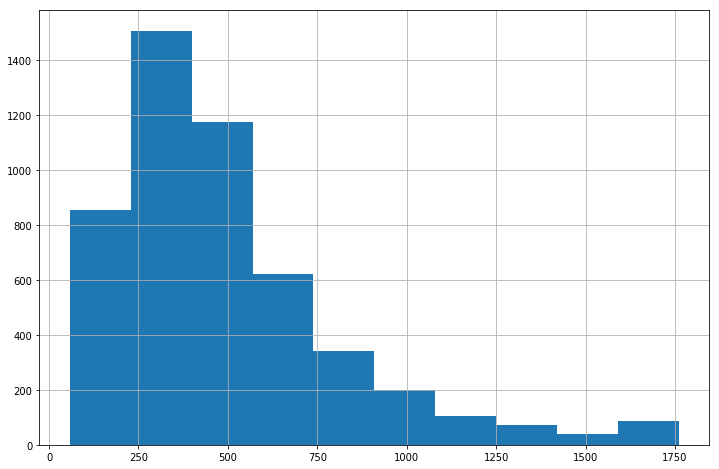

In [113]:
data_new.totalspent.hist()

C:\Users\Akhtar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


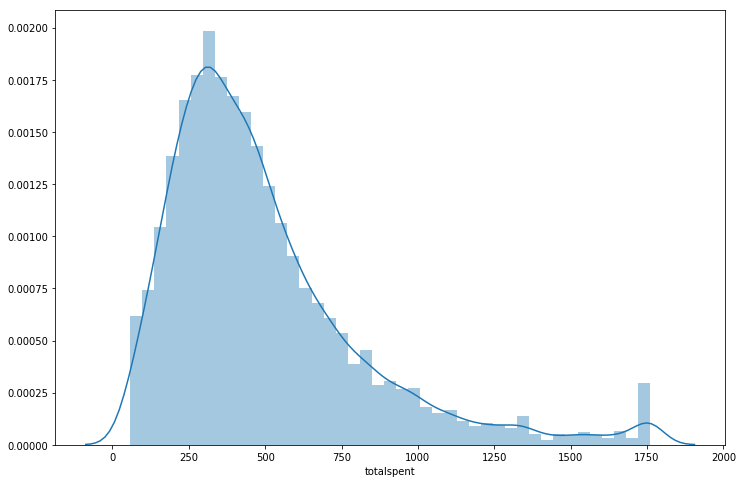

In [114]:
sns.distplot(data_new.totalspent)

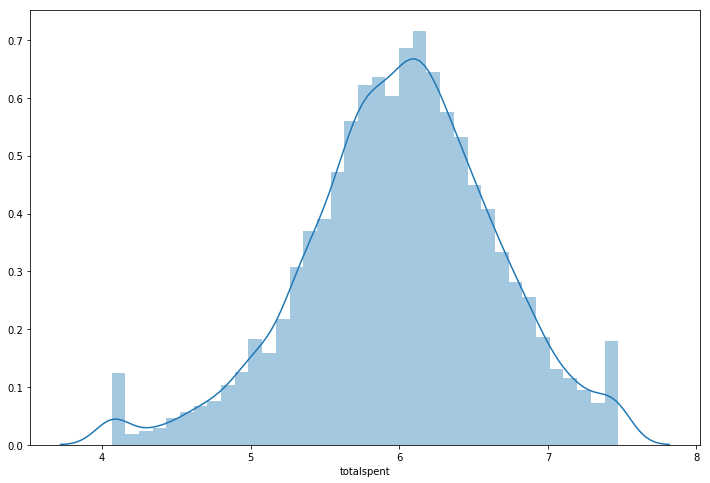

In [115]:
sns.distplot(np.log(data_new.totalspent))

In [116]:
stats.anderson(data_num.totalspent,dist="norm")

AndersonResult(statistic=169.0956776043713, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [117]:
stats.anderson(np.log(data_num.totalspent),dist="norm")

AndersonResult(statistic=7.017299904279753, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [118]:
stats.anderson(np.sqrt(data_num.totalspent),dist="norm")

AndersonResult(statistic=36.984406173214666, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### Assumptions of Linear Regression
#### Creating a new variable which is the transformed one for the dependent variable(totalspent) since totalspent is not following 
#### normality , we transformed the variable using log tranformation and now, the dependent variable is following Normality.

In [119]:
data_new["ln_totalspent"] = np.log(data_new.totalspent)

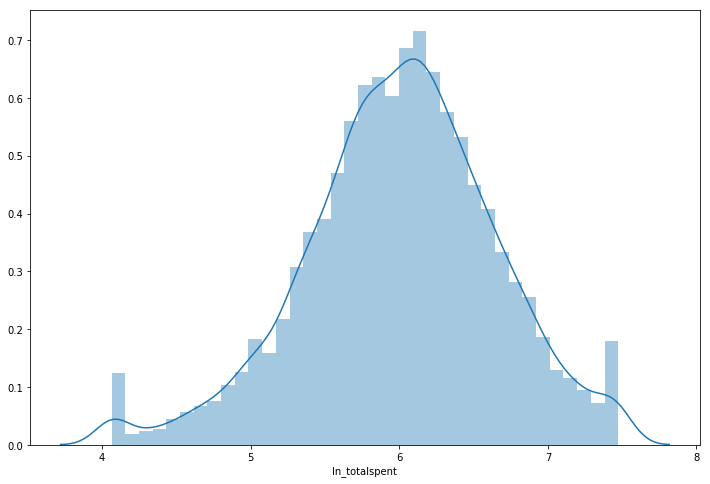

In [120]:
sns.distplot(data_new["ln_totalspent"])

### RFE (Have selected 25 variables from this process)

In [122]:
features = data_new.drop(columns= ['ln_totalspent', 'totalspent'],axis=1 )


In [123]:
target = data_new['ln_totalspent']

In [124]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import itertools

lm = LinearRegression()

# create the RFE model and select 50 attributes
rfe = RFE(lm, n_features_to_select=25)
rfe = rfe.fit(features, target)

In [125]:
features.columns

Index(['gender_1', 'birthmonth_August', 'birthmonth_December',
       'birthmonth_February', 'birthmonth_January', 'birthmonth_July',
       'birthmonth_June', 'birthmonth_March', 'birthmonth_May',
       'birthmonth_November',
       ...
       'commutetime', 'longmon', 'tollmon', 'tollten', 'equipten', 'cardmon',
       'cardten', 'wiremon', 'wireten', 'hourstv'],
      dtype='object', length=341)

In [126]:
rfe.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False,  True,

In [127]:
RFE_features=features.columns[rfe.get_support()]

In [128]:
features1 = features[RFE_features]

In [129]:
features1.head()

,retire_1,employ_25,employ_26,employ_32,employ_34,employ_36,employ_39,employ_42,employ_44,employ_46,...,address_53,address_55,card2_2,card2_3,card2_4,card2_5,card_2,card_3,card_4,card_5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [130]:
features1.columns

Index(['retire_1', 'employ_25', 'employ_26', 'employ_32', 'employ_34',
       'employ_36', 'employ_39', 'employ_42', 'employ_44', 'employ_46',
       'employ_48', 'employ_49', 'employ_51', 'employ_52', 'address_51',
       'address_53', 'address_55', 'card2_2', 'card2_3', 'card2_4', 'card2_5',
       'card_2', 'card_3', 'card_4', 'card_5'],
      dtype='object')

### F- Regression (This technique gave 80 variables having p value less than 0.05)

In [131]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  features, target )

In [132]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

In [133]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [134]:
f_reg_res1 = f_reg_results.sort_values(by=['F_Value'], ascending=False)

In [135]:
f_reg_res1[0:40]

,Variable,F_Value,P_Value
317,income,724.662085,0.000
330,carvalue,519.265495,0.000
320,othdebt,363.647215,0.000
319,creddebt,287.876989,0.000
13,retire_1,204.476976,0.000
54,owndvd_1,138.282716,0.000
15,carown_1,131.866254,0.000
48,ownvcr_1,125.995381,0.000
198,reason_2,113.372065,0.000
55,owncd_1,111.383646,0.000


In [136]:
f_reg_res1[40:80]

,Variable,F_Value,P_Value
299,card2_5,13.881409,0.000
80,employ_1,13.325918,0.000
47,forward_1,13.190352,0.000
134,address_4,11.341392,0.001
200,reason_4,10.631370,0.001
303,card_5,10.529628,0.001
209,internet_3,10.301518,0.001
43,multline_1,10.284255,0.001
79,jobsat_5,10.242022,0.001
131,address_1,10.198180,0.001


### Selecting 20 variables from Select KBest. (All the 20 variables are also available in the varibles suggested by F-Regression)

In [137]:
#### Select K Best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [138]:
X = data_new.drop(columns= ['ln_totalspent', 'totalspent'],axis=1 ) # Independent variables
X_new = SelectKBest(f_regression, k=25).fit(X, data_new[['ln_totalspent']] ) 

# The format is almost same as RFE , Here giving 20 variables to select out of 320 variables 

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
X_new.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [140]:
X_new.scores_

array([3.10733795e+01, 2.26916757e-01, 2.64508343e+00, 1.69171611e+00,
       8.66052302e-04, 1.84529906e-01, 1.43663795e-01, 8.79547848e-03,
       6.56696000e-02, 2.52214076e-01, 2.40861866e-05, 2.70970490e-01,
       2.24545329e+00, 2.04476976e+02, 1.66098827e+00, 1.31866254e+02,
       1.74603829e+00, 2.44858616e+01, 1.08805978e+00, 6.10584052e-02,
       1.27713194e+00, 1.23237828e+00, 1.28500145e+00, 2.97470617e-01,
       8.02336995e-01, 6.28489537e-01, 8.26389895e-02, 3.30955793e+00,
       5.52299436e-02, 6.96768177e-01, 4.43764283e-02, 9.22975254e-01,
       1.34874379e+00, 3.06015133e+00, 9.57434738e-02, 6.34861011e+00,
       9.95556648e-01, 1.56288621e+01, 9.91401988e-02, 1.87348890e+00,
       1.47928219e+01, 2.31460805e+00, 2.75494395e+01, 1.02842554e+01,
       1.01324645e+01, 1.56037474e+01, 1.60656812e+01, 1.31903521e+01,
       1.25995381e+02, 1.90209001e+01, 1.53193763e+01, 5.20952963e+00,
       3.65122240e+01, 1.97849726e+01, 1.38282716e+02, 1.11383646e+02,
      

In [141]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

In [142]:
KBest_features

Index(['gender_1', 'retire_1', 'carown_1', 'wireless_1', 'ownvcr_1', 'owntv_1',
       'owndvd_1', 'owncd_1', 'jobcat_2', 'reason_2', 'card2_2', 'card2_3',
       'card_2', 'card_3', 'card_4', 'ed', 'income', 'creddebt', 'othdebt',
       'carvalue', 'tollmon', 'tollten', 'equipten', 'wiremon', 'wireten'],
      dtype='object')

### Variance Inflation Factor (Combining variables from RFE and F-regression and combining them to decipher the multicollinearity among variables)

In [143]:
list_vars = ['retire_1', 'employ_25', 'employ_26', 'employ_32', 'employ_34',  # 1st set of Variables from RFE
       'employ_36', 'employ_39', 'employ_42', 'employ_44', 'employ_46',
       'employ_48', 'employ_49', 'employ_51', 'employ_52', 'address_51',
       'address_53', 'address_55', 'card2_2', 'card2_3', 'card2_4', 'card2_5',
       'card_2', 'card_3', 'card_4', 'card_5',
        
      'gender_1', 'carown_1', 'wireless_1', 'ownvcr_1', 'owntv_1',    # 2nd set combined from Select KBest and F-Regression
       'owndvd_1', 'owncd_1', 'jobcat_2', 'reason_2', 'ed', 'income', 'creddebt', 'othdebt',
       'carvalue', 'tollmon', 'tollten', 'equipten', 'wiremon', 'wireten','tenure_22']

In [144]:
all_columns = "+".join(list_vars)

In [145]:
all_columns

'retire_1+employ_25+employ_26+employ_32+employ_34+employ_36+employ_39+employ_42+employ_44+employ_46+employ_48+employ_49+employ_51+employ_52+address_51+address_53+address_55+card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+card_5+gender_1+carown_1+wireless_1+ownvcr_1+owntv_1+owndvd_1+owncd_1+jobcat_2+reason_2+ed+income+creddebt+othdebt+carvalue+tollmon+tollten+equipten+wiremon+wireten+tenure_22'

In [146]:
my_formula = "ln_totalspent~" + all_columns
print(my_formula)

ln_totalspent~retire_1+employ_25+employ_26+employ_32+employ_34+employ_36+employ_39+employ_42+employ_44+employ_46+employ_48+employ_49+employ_51+employ_52+address_51+address_53+address_55+card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+card_5+gender_1+carown_1+wireless_1+ownvcr_1+owntv_1+owndvd_1+owncd_1+jobcat_2+reason_2+ed+income+creddebt+othdebt+carvalue+tollmon+tollten+equipten+wiremon+wireten+tenure_22


In [147]:
my_formula = 'ln_totalspent~retire_1+employ_25+employ_26+employ_32+employ_34+employ_36+employ_39+employ_42+employ_44+employ_46+employ_48+employ_49+employ_51+employ_52+address_51+address_53+address_55+card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+card_5+gender_1+carown_1+wireless_1+ownvcr_1+owntv_1+owndvd_1+owncd_1+jobcat_2+reason_2+ed+income+creddebt+othdebt+carvalue+tollmon+equipten+wireten+tenure_22'

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# get y and X dataframes based on this regression
y, X = dmatrices(my_formula, data_new, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)
vif.sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
0,113.912290,Intercept
36,4.846817,income
39,3.405650,carvalue
42,3.166466,wireten
28,2.386234,wireless_1
20,2.287109,card2_4
38,2.260831,othdebt
24,2.197767,card_4
19,2.172337,card2_3
18,2.093214,card2_2


In [163]:
vif.to_excel("VIF.xlsx")

In [149]:
my_formula

'ln_totalspent~retire_1+employ_25+employ_26+employ_32+employ_34+employ_36+employ_39+employ_42+employ_44+employ_46+employ_48+employ_49+employ_51+employ_52+address_51+address_53+address_55+card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+card_5+gender_1+carown_1+wireless_1+ownvcr_1+owntv_1+owndvd_1+owncd_1+jobcat_2+reason_2+ed+income+creddebt+othdebt+carvalue+tollmon+equipten+wireten+tenure_22'

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

import statsmodels.formula.api as sm

In [151]:
train, test = train_test_split( data_new, test_size = 0.3, random_state = 123)

print(len(train))
print(len(test))

3500
1500


In [152]:
my_formula = 'ln_totalspent~retire_1+employ_32+employ_44+card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+card_5+gender_1+carown_1+owndvd_1+owncd_1+reason_2+income+tenure_22' 

In [153]:
model = sm.ols(my_formula, data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_totalspent   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     96.83
Date:                Sun, 21 Apr 2019   Prob (F-statistic):          4.65e-290
Time:                        17:46:33   Log-Likelihood:                -2781.6
No. Observations:                3500   AIC:                             5601.
Df Residuals:                    3481   BIC:                             5718.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3757      0.057    111.028      0.0

In [286]:
f = open('Modeloutput.csv','w')
f.write(model.summary().as_csv())
f.close()

In [288]:
list_vars1 = ['ln_totalspent','retire_1','employ_32','employ_44','card2_2','card2_3','card2_4','card2_5','card_2','card_3','card_4','card_5','gender_1','carown_1','owndvd_1','owncd_1','reason_2','income','tenure_22'] 

In [290]:
data_final_features = data_new[list_vars1]

In [291]:
final_var_corr = data_final_features.corr()

In [294]:
final_var_corr.to_excel("FinalModelVarCorr.xlsx")

In [154]:
mape = np.mean(np.abs(train.totalspent - np.exp(model.predict(train)))/train.totalspent)

In [155]:
mape

0.4842531288004641

In [156]:
train['pred'] = pd.DataFrame(np.exp(model.predict(train)))

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
train['pred_ln'] = pd.DataFrame(model.predict(train))

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
train.head()

,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,...,cardmon,cardten,wiremon,wireten,hourstv,totalspent,ln_totalspent,pred,Deciles,pred_ln
4036,1,0,0,0,0,0,0,0,0,0,...,30.25,2185.0,0.0,0.00,20.0,668.1400,6.504498,477.060926,6,6.167644
2883,1,0,0,0,0,0,0,0,0,0,...,14.50,690.0,0.0,0.00,18.0,181.8300,5.203072,335.888420,3,5.816779
4162,0,0,0,0,1,0,0,0,0,0,...,54.25,1310.0,47.8,1117.15,20.0,219.5400,5.391534,315.947339,2,5.755576
4640,0,0,1,0,0,0,0,0,0,0,...,10.25,345.0,0.0,0.00,20.0,500.0100,6.214628,397.145678,5,5.984303
2430,0,0,0,0,0,0,0,0,0,0,...,10.50,305.0,0.0,0.00,16.0,1760.1024,7.473127,452.548579,6,6.114895


In [158]:
test['pred'] = pd.DataFrame(np.exp(model.predict(test)))
test.head()

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,...,tollten,equipten,cardmon,cardten,wiremon,wireten,hourstv,totalspent,ln_totalspent,pred
2648,0,0,0,0,0,0,0,0,0,0,...,0.00,39.4,0.0,0.0,26.2,34.8,31.0,325.49,5.785332,313.746028
2456,1,0,0,0,0,0,0,1,0,0,...,56.85,0.0,15.5,5.0,0.0,0.0,17.0,515.02,6.244206,392.998541
4557,0,0,0,0,0,0,0,0,1,0,...,0.00,0.0,0.0,0.0,0.0,0.0,26.0,561.52,6.330647,467.562845
4884,0,0,1,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,16.0,483.45,6.180948,270.630612
92,0,0,0,0,1,0,0,0,0,0,...,0.00,261.2,0.0,0.0,0.0,0.0,20.0,490.75,6.195935,366.995411


In [171]:
test['pred_ln'] = pd.DataFrame(model.predict(test))

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
test.head()

,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,...,cardmon,cardten,wiremon,wireten,hourstv,totalspent,ln_totalspent,pred,Deciles,pred_ln
2648,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,26.2,34.8,31.0,325.49,5.785332,313.746028,2,5.748584
2456,1,0,0,0,0,0,0,1,0,0,...,15.5,5.0,0.0,0.0,17.0,515.02,6.244206,392.998541,5,5.973806
4557,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,26.0,561.52,6.330647,467.562845,6,6.147534
4884,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,16.0,483.45,6.180948,270.630612,1,5.600755
92,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,20.0,490.75,6.195935,366.995411,4,5.905349


In [159]:
from sklearn import metrics

In [160]:
#Train Data
MAPE_train = np.mean(np.abs(train.totalspent - train.pred)/train.totalspent )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.totalspent , train.pred)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.totalspent , train.pred)
print(Corr_train)

0.4842531288004641
73943.95325461352
(0.5802935297342317, 3.093285931e-314)


In [161]:
#Test Data
MAPE_test = np.mean(np.abs(test.totalspent - test.pred)/test.totalspent )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.totalspent , test.pred)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.totalspent , test.pred)
print(Corr_test)

0.45279807796162497
74268.58494617468
(0.5386702795480347, 1.2550927457932497e-113)


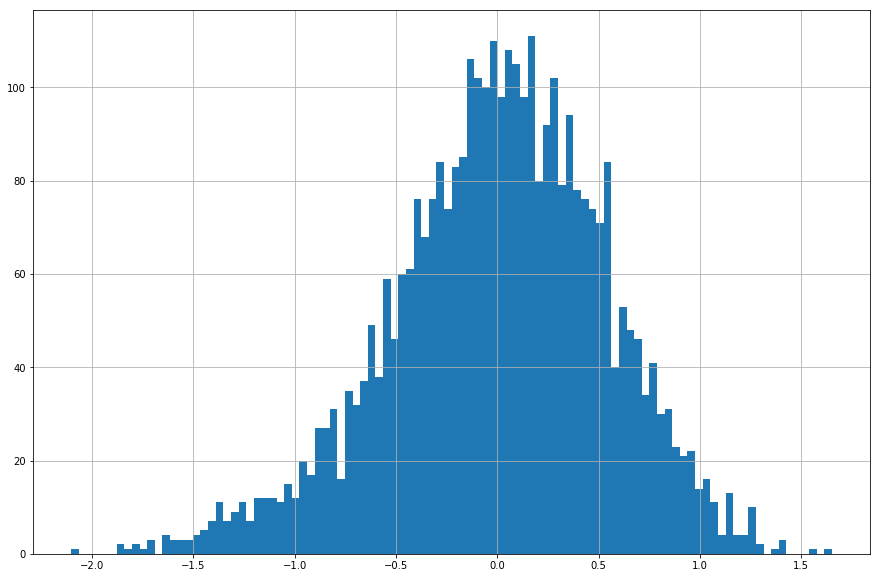

In [162]:
plt.subplots(figsize = (15,10))
model.resid.hist(bins=100)

### Decile Analysis

In [166]:
# For Train

train['Deciles']=pd.qcut(train['pred'],10, labels=False)

avg_actual = train[['Deciles','totalspent']].groupby(train.Deciles).mean().sort_index(ascending=False)['totalspent']
avg_pred = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']
count = train.Deciles.value_counts()

Decile_analysis_train = pd.concat([avg_actual, avg_pred,count], axis=1)
Decile_analysis_train.rename(columns={'Deciles':'Count'},inplace=True)

Decile_analysis_train

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,totalspent,pred,Count
0,261.159221,228.509716,350
1,319.560073,281.190914,350
2,357.275008,309.363196,352
3,385.186847,330.246010,348
4,411.790494,353.578081,350
5,470.359822,390.637016,350
6,484.875585,448.910310,350
7,606.799683,514.636455,350
8,685.434799,608.941929,350
9,925.922280,862.841108,350


In [173]:
# For Train (ln_totalspent)

train['Deciles1']=pd.qcut(train['pred_ln'],10, labels=False)

avg_actual = train[['Deciles1','ln_totalspent']].groupby(train.Deciles1).mean().sort_index(ascending=False)['ln_totalspent']
avg_pred = train[['Deciles1','pred_ln']].groupby(train.Deciles1).mean().sort_index(ascending=False)['pred_ln']
count = train.Deciles1.value_counts()

Decile_analysis_train1 = pd.concat([avg_actual, avg_pred,count], axis=1)
Decile_analysis_train1.rename(columns={'Deciles':'Count'},inplace=True)

Decile_analysis_train1

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ln_totalspent,pred_ln,Deciles1
0,5.388623,5.425153,350
1,5.623580,5.638312,350
2,5.745032,5.734295,352
3,5.808873,5.799690,348
4,5.884495,5.867869,350
5,6.008991,5.967017,350
6,6.061530,6.106134,350
7,6.280386,6.242323,350
8,6.404562,6.410496,350
9,6.720852,6.735646,350


In [167]:
#Decile analysis - Test

test['Deciles']=pd.qcut(test['pred'],10, labels=False)

avg_actual_test = test[['Deciles','totalspent']].groupby(test.Deciles).mean().sort_index(ascending=False)['totalspent']
avg_pred_test = test[['Deciles','pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred']
count = test.Deciles.value_counts()

Decile_analysis_test = pd.concat([avg_actual_test, avg_pred_test,count], axis=1)
Decile_analysis_test.rename(columns={'Deciles':'Count'},inplace=True)

Decile_analysis_test

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,totalspent,pred,Count
0,285.675650,234.173086,151
1,327.442838,285.791807,149
2,353.462119,312.402823,151
3,388.831384,334.198100,150
4,450.504430,359.851571,149
5,473.260215,402.835436,151
6,574.688591,457.829854,149
7,592.339303,534.022422,151
8,700.888252,619.897587,149
9,850.598595,867.610265,150


In [174]:
#Decile analysis - Test

test['Deciles1']=pd.qcut(test['pred_ln'],10, labels=False)

avg_actual_test = test[['Deciles1','ln_totalspent']].groupby(test.Deciles1).mean().sort_index(ascending=False)['ln_totalspent']
avg_pred_test = test[['Deciles1','pred_ln']].groupby(test.Deciles1).mean().sort_index(ascending=False)['pred_ln']
count = test.Deciles1.value_counts()

Decile_analysis_test1 = pd.concat([avg_actual_test, avg_pred_test,count], axis=1)
Decile_analysis_test1.rename(columns={'Deciles':'Count'},inplace=True)

Decile_analysis_test1

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ln_totalspent,pred_ln,Deciles1
0,5.503380,5.449708,151
1,5.663778,5.654650,149
2,5.737902,5.744121,151
3,5.826326,5.811555,150
4,6.009706,5.885357,149
5,6.034033,5.997868,151
6,6.241224,6.125780,149
7,6.258175,6.279054,151
8,6.427816,6.428511,149
9,6.631971,6.741334,150


In [177]:
Train_Decile = pd.concat([Decile_analysis_train,Decile_analysis_train1],axis=1)

In [178]:
Train_Decile.to_excel("TRain_Decile_Final.xlsx")

In [180]:
Test_Decile = pd.concat([Decile_analysis_test,Decile_analysis_test1],axis=1)

In [181]:
Test_Decile.to_excel("Test_Decile_FInal.xlsx")

### Model Building using Sklearn

In [182]:
features_vars = ['retire_1','employ_32','employ_44','card2_2','card2_3','card2_4','card2_5','card_2','card_3','card_4','card_5','gender_1','carown_1','owndvd_1','owncd_1','reason_2','income','tenure_22']

In [183]:
X_train = train[features_vars]

In [184]:
X_test = test[features_vars]

In [185]:
y_train = train.totalspent

In [186]:
y_test = test.totalspent

In [187]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=8)

modelCV = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average r2 score: %.3f" % (results.mean()))

10-fold cross validation average r2 score: 0.334


In [188]:
results

array([0.31571516, 0.33050185, 0.36464388, 0.2972481 , 0.39628634,
       0.37027217, 0.25550809, 0.27374535, 0.40113286, 0.33319139])

### Decision Trees

In [189]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [190]:
reg_tree = DecisionTreeRegressor( max_depth = 3 )
reg_tree = reg_tree.fit( X_train, y_train )

In [191]:
pd.DataFrame(reg_tree.predict(X_train)).head()

,0
0,441.210838
1,441.210838
2,441.210838
3,441.210838
4,441.210838


In [192]:
pred = pd.DataFrame(reg_tree.predict( X_train ), index=X_train.index)

In [193]:
tree_train_pred = pd.concat([y_train, pred], axis=1)

In [194]:
tree_train_pred.columns = ['actual', 'predicted']

In [195]:
tree_train_pred.head()

,actual,predicted
4036,668.1400,441.210838
2883,181.8300,441.210838
4162,219.5400,441.210838
4640,500.0100,441.210838
2430,1760.1024,441.210838


In [196]:
pred_test = pd.DataFrame(reg_tree.predict( X_test ), index=X_test.index)
tree_test_pred = pd.concat([y_test, pred_test], axis=1)
tree_test_pred.columns = ['actual', 'predicted']
tree_test_pred.head()

,actual,predicted
2648,325.49,358.973441
2456,515.02,656.775380
4557,561.52,358.973441
4884,483.45,358.973441
92,490.75,656.775380


In [197]:
print("Train r2_score:")
print(metrics.r2_score( tree_train_pred.actual, tree_train_pred.predicted ))

print("Test r2_score:")
print(metrics.r2_score( tree_test_pred.actual, tree_test_pred.predicted ))

Train r2_score:
0.20172993485184276
Test r2_score:
0.12181332636212794


In [ ]:
# Tuning Parameters for DT

In [198]:
param_grid = {'max_depth': np.arange(3, 7),
             'max_features': np.arange(7,12)}

In [199]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
tree.fit( X_train, y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5, 6]), 'max_features': array([ 7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [200]:
tree.best_score_

0.2172890908496764

In [201]:
tree.best_params_

{'max_depth': 6, 'max_features': 11}

In [202]:
reg_tree = DecisionTreeRegressor(max_depth = 6, max_features = 11)

In [203]:
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=11,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [204]:
reg_tree.predict(X_train)

array([534.39303089, 534.39303089, 322.70548421, ..., 534.39303089,
       322.70548421, 338.38766   ])

### Feature IMportance from Decision Trees

In [280]:
reg_tree.feature_importances_

array([2.80519829e-03, 1.27304249e-02, 3.66249464e-03, 1.86351208e-02,
       3.02557606e-02, 3.79692296e-03, 0.00000000e+00, 6.80590986e-02,
       1.35455845e-01, 6.73283734e-02, 1.02761383e-02, 1.25946073e-02,
       3.18632038e-03, 3.89991845e-04, 7.30114275e-03, 4.41867787e-02,
       5.79244124e-01, 9.16573321e-05])

In [281]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, reg_tree.feature_importances_)]
feature_map

[('retire_1', 0.0028051982915554205),
 ('employ_32', 0.012730424880210202),
 ('employ_44', 0.003662494639552661),
 ('card2_2', 0.01863512076404708),
 ('card2_3', 0.03025576058607435),
 ('card2_4', 0.0037969229631669016),
 ('card2_5', 0.0),
 ('card_2', 0.06805909860025962),
 ('card_3', 0.13545584498895946),
 ('card_4', 0.06732837339914531),
 ('card_5', 0.010276138253802839),
 ('gender_1', 0.012594607341929787),
 ('carown_1', 0.0031863203811793046),
 ('owndvd_1', 0.0003899918453426857),
 ('owncd_1', 0.00730114274521262),
 ('reason_2', 0.044186778698561316),
 ('income', 0.5792441242888852),
 ('tenure_22', 9.165733211532899e-05)]

In [282]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
16,income,0.579244
8,card_3,0.135456
7,card_2,0.068059
9,card_4,0.067328
15,reason_2,0.044187
4,card2_3,0.030256
3,card2_2,0.018635
1,employ_32,0.012730
11,gender_1,0.012595
10,card_5,0.010276


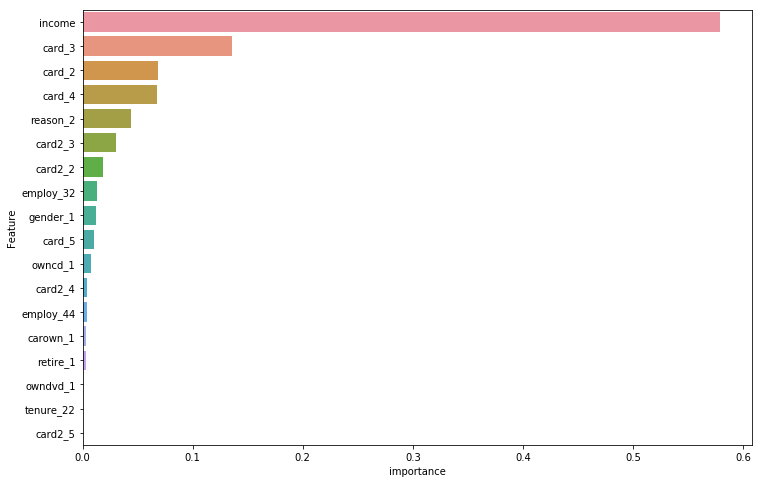

In [285]:
sns.barplot(y = 'Feature',x= 'importance',data= Feature_importance)

In [205]:
metrics.mean_squared_error(y_train,reg_tree.predict(X_train))

71737.02599048257

In [206]:
metrics.mean_squared_error(y_test,reg_tree.predict(X_test))

81688.57734186594

In [208]:
# For Train
MAPE_train = np.mean(np.abs(train.totalspent - reg_tree.predict(X_train))/train.totalspent)
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.totalspent, reg_tree.predict(X_train))
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.totalspent, reg_tree.predict(X_train))
print (Corr_train)

0.5936075224173623
71737.02599048257
(0.5707840300895441, 8.5327789163682e-302)


In [209]:
#Test Data
MAPE_test = np.mean(np.abs(test.totalspent - reg_tree.predict(X_test))/test.totalspent )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.totalspent , reg_tree.predict(X_test))
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.totalspent , reg_tree.predict(X_test))
print(Corr_test)

0.5726082683968975
81688.57734186594
(0.44491335117633973, 8.173490615810996e-74)


### KNN

In [210]:
from sklearn.neighbors import KNeighborsRegressor

In [211]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_reg = GridSearchCV(KNeighborsRegressor(),
                   tuned_parameters,
                   cv=5,
                   scoring='neg_mean_squared_error')

In [212]:
knn_reg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [3, 5, 7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [213]:
knn_reg.best_score_

-88014.8402444081

In [214]:
knn_reg.best_params_

{'n_neighbors': 11}

In [215]:
knn_reg = KNeighborsRegressor(n_neighbors=11,n_jobs=-1)

In [216]:
knn_reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
          weights='uniform')

In [219]:
metrics.r2_score(y_train,knn_reg.predict(X_train))

0.3194937940371262

In [220]:
# For Train
MAPE_train = np.mean(np.abs(train.totalspent - knn_reg.predict(X_train))/train.totalspent)
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.totalspent, knn_reg.predict(X_train))
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.totalspent, knn_reg.predict(X_train))
print (Corr_train)

0.5862519148262796
72407.4259185791
(0.5661494661548464, 7.046642064084513e-296)


In [221]:
#Test Data
MAPE_test = np.mean(np.abs(test.totalspent - knn_reg.predict(X_test))/test.totalspent )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.totalspent , knn_reg.predict(X_test))
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.totalspent , knn_reg.predict(X_test))
print(Corr_test)

0.6038441924138956
89532.79897058196
(0.3566228299431736, 3.255281274862075e-46)


### ADABoost

In [222]:
from sklearn.ensemble import AdaBoostRegressor

In [223]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [224]:
gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [225]:
gscv_ada.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   25.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [226]:
gscv_ada.best_score_

0.19786823647922216

In [227]:
gscv_ada.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [228]:
gsvc_ada = AdaBoostRegressor(learning_rate=0.01,n_estimators=200)

In [229]:
gsvc_ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
         n_estimators=200, random_state=None)

In [230]:
metrics.r2_score(y_train,gscv_ada.predict(X_train))

0.225758976781669

In [231]:
metrics.r2_score(y_test,gscv_ada.predict(X_test))

0.14049127057404098

In [232]:
metrics.mean_squared_error(y_train,gscv_ada.predict(X_train))

82381.02612522636

In [233]:
metrics.mean_squared_error(y_test,gscv_ada.predict(X_test))

85029.51200355278

In [234]:
# For Train
MAPE_train = np.mean(np.abs(train.totalspent - gsvc_ada.predict(X_train))/train.totalspent)
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.totalspent, gsvc_ada.predict(X_train))
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.totalspent, gsvc_ada.predict(X_train))
print (Corr_train)

0.6992586975222185
82528.57269077642
(0.48292506709938177, 5.473290121979486e-204)


In [235]:
#Test Data
MAPE_test = np.mean(np.abs(test.totalspent - gsvc_ada.predict(X_test))/test.totalspent )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.totalspent , gsvc_ada.predict(X_test))
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.totalspent , gsvc_ada.predict(X_test))
print(Corr_test)

0.6437906107797344
84984.60376993124
(0.38962383891979857, 1.460437009504208e-55)


### XGBoost

In [236]:
from xgboost import XGBRegressor

In [237]:
#All Columns
xgb_estimator = XGBRegressor(n_estimators=200,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)

In [238]:
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=1)

In [239]:
xgb_estimator.predict(X_test)

array([364.54886, 487.32706, 440.79254, ..., 389.40405, 548.9981 ,
       352.73886], dtype=float32)

In [240]:
metrics.r2_score(y_train,xgb_estimator.predict(X_train))

0.4389430696778135

In [241]:
metrics.r2_score(y_test,xgb_estimator.predict(X_test))

0.2734144267569132

In [242]:
metrics.mean_squared_error(y_train,xgb_estimator.predict(X_train))

59697.748179868126

In [243]:
metrics.mean_squared_error(y_test,xgb_estimator.predict(X_test))

71879.68499510552

#### Tuning the Parameters

In [244]:
paramgrid = {'n_estimators' : [100,150,200,250,300,500,800,1000],
            'max_depth' : [3,4,5,6],
            'learning_rate' : [0.01,0.001,0.02] }

In [245]:
xgb_estimator1 =GridSearchCV(estimator=XGBRegressor(),
                            param_grid = paramgrid,
                            cv = 5,
                            n_jobs = -1,verbose=True)

In [246]:
xgb_estimator1.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 500, 800, 1000], 'max_depth': [3, 4, 5, 6], 'learning_rate': [0.01, 0.001, 0.02]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [247]:
xgb_estimator1.best_params_

{'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 800}

In [248]:
xgb_estimator1.best_score_

0.32878697926043016

In [249]:
xgb_final = XGBRegressor(n_estimators = 800,max_depth=3,learning_rate=0.02,n_jobs=-1,verbose=True)

In [251]:
xgb_final.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=800,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=True)

In [252]:
# For Train
metrics.r2_score(y_train,pd.DataFrame(xgb_final.predict(X_train)))

0.4182235162653133

In [253]:
# FOr Test
metrics.r2_score(y_test,pd.DataFrame(xgb_final.predict(X_test)))

0.2848161796290133

In [254]:
# For Train
MAPE_train = np.mean(np.abs(train.totalspent - xgb_final.predict(X_train))/train.totalspent)
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.totalspent, xgb_final.predict(X_train))
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.totalspent, xgb_final.predict(X_train))
print (Corr_train)

0.5436901319494927
61902.356331323404
(0.6508442950371813, 0.0)


In [255]:
#Test Data
MAPE_test = np.mean(np.abs(test.totalspent - xgb_final.predict(X_test))/test.totalspent )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.totalspent , xgb_final.predict(X_test))
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.totalspent , xgb_final.predict(X_test))
print(Corr_test)

0.5268364334402504
70751.73195692374
(0.5372786179175573, 6.098818424702788e-113)


### RAndom Forest

In [256]:
from sklearn.ensemble import RandomForestRegressor

radm_reg= RandomForestRegressor(oob_score=True,n_estimators=100 , max_features=8, n_jobs=-1,random_state=42)
radm_reg.fit( X_train, y_train )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [257]:
radm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': radm_reg.predict( X_test ) } )

metrics.mean_squared_error( radm_test_pred.actual, radm_test_pred.predicted )

88084.45567778907

In [258]:
# For Train
metrics.r2_score(radm_test_pred.actual,radm_test_pred.predicted)

0.10961080690866087

#### Tuning the Parameters

In [268]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100,150,200,300,500,800,1000,1200],
                'max_features': [2,10],
                 'max_depth' : [2,10]}

from sklearn.model_selection import GridSearchCV
gscv_Rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [269]:
gscv_results = gscv_Rf.fit(X_train, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:   40.5s finished


In [270]:
gscv_results.best_score_

0.3066447026510904

In [271]:
gscv_results.best_params_

{'max_depth': 10, 'max_features': 10, 'n_estimators': 70}

In [272]:
gscv_Rf = RandomForestRegressor(max_features=10,max_depth=10,n_estimators=70,n_jobs=-1)

In [273]:
gscv_Rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=70, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [274]:
metrics.r2_score(y_train,gscv_Rf.predict(X_train))

0.5553650568785184

In [275]:
metrics.r2_score(y_test,gscv_Rf.predict(X_test))

0.24323669262682568

In [276]:
# For Train
MAPE_train = np.mean(np.abs(train.totalspent - gscv_Rf.predict(X_train))/train.totalspent)
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.totalspent, gscv_Rf.predict(X_train))
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.totalspent, gscv_Rf.predict(X_train))
print (Corr_train)

0.47167580363233363
47310.18089589143
(0.7598088226546383, 0.0)


In [277]:
#Test Data
MAPE_test = np.mean(np.abs(test.totalspent - gscv_Rf.predict(X_test))/test.totalspent )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.totalspent , gscv_Rf.predict(X_test))
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.totalspent , gscv_Rf.predict(X_test))
print(Corr_test)

0.550511768457717
74865.10901536889
(0.5051372441815681, 6.073710678188881e-98)


### Feature Importance from Random Forest 

In [278]:
gscv_Rf.feature_importances_
indices = np.argsort(gscv_Rf.feature_importances_)[::-1]

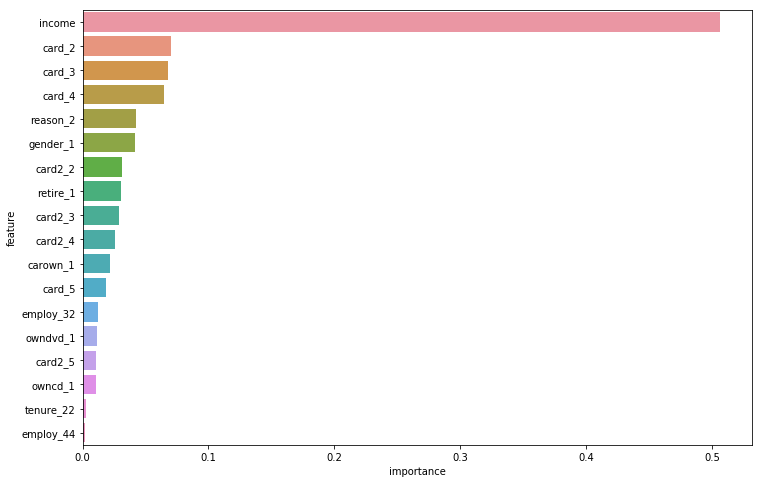

In [279]:
indices = np.argsort(gscv_Rf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         gscv_Rf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )